In [31]:
import sys
from pathlib import Path
sys.path.append(str(Path(sys.argv[0]).absolute().parent.parent.parent.parent))
# add the entire folder to path
from src.utils import utils

In [32]:
import pandas as pd

df = pd.read_parquet("../data/raw/2022-10-26_hiscore_data.parquet.gzip")
df.head()


,name,created_at,updated_at,possible_ban,confirmed_ban,label_id,label,account_status,id,timestamp,...,tombs_of_amascut,tombs_of_amascut_expert,tzkal_zuk,tztok_jad,venenatis,vetion,vorkath,wintertodt,zalcano,zulrah
Player_id,,,,,,,,,,,,,,,,,,,,,
1,3BA604236FB0319D5937E31388B0C64C,2021-03-14 20:22:45,2022-12-19 05:02:57,0,0,1,Real_Player,not banned,59568395,2022-12-19 05:04:16,...,0.0,0.0,0,0,0,0,0,0,0,0
8,5A02B5A7F38AD2623A9C5E68DF01EC2F,2021-03-14 20:42:37,2022-12-19 00:36:08,0,0,1,Real_Player,not banned,59622273,2022-12-19 00:36:09,...,0.0,0.0,0,10,0,0,114,73,0,1256
29,59DCFCAFC1F3DF3326F36E7A39B741FC,2021-03-14 22:17:16,2022-12-19 14:49:19,0,0,1,Real_Player,not banned,292513577,2022-12-19 14:49:20,...,0.0,0.0,0,0,0,0,0,0,0,0
39,1C74EFD6CE51790D7BF65A94F47675B5,2021-03-14 22:17:23,2022-12-19 17:46:42,0,0,1,Real_Player,not banned,59503415,2022-12-19 17:46:53,...,235.0,0.0,0,0,0,0,279,1526,145,0
59,E666957B20A95519E6306D75FEC4DE19,2021-03-14 22:17:40,2022-12-19 01:23:32,1,0,1,Real_Player,not banned,59615490,2022-07-27 06:41:21,...,0.0,0.0,0,20,0,0,1000,500,0,400


In [33]:
df.columns

Index(['name', 'created_at', 'updated_at', 'possible_ban', 'confirmed_ban',
       'label_id', 'label', 'account_status', 'id', 'timestamp', 'ts_date',
       'total', 'attack', 'defence', 'strength', 'hitpoints', 'ranged',
       'prayer', 'magic', 'cooking', 'woodcutting', 'fletching', 'fishing',
       'firemaking', 'crafting', 'smithing', 'mining', 'herblore', 'agility',
       'thieving', 'slayer', 'farming', 'runecraft', 'hunter', 'construction',
       'league', 'bounty_hunter_hunter', 'bounty_hunter_rogue', 'cs_all',
       'cs_beginner', 'cs_easy', 'cs_medium', 'cs_hard', 'cs_elite',
       'cs_master', 'lms_rank', 'soul_wars_zeal', 'abyssal_sire',
       'alchemical_hydra', 'barrows_chests', 'bryophyta', 'callisto',
       'cerberus', 'chambers_of_xeric', 'chambers_of_xeric_challenge_mode',
       'chaos_elemental', 'chaos_fanatic', 'commander_zilyana',
       'corporeal_beast', 'crazy_archaeologist', 'dagannoth_prime',
       'dagannoth_rex', 'dagannoth_supreme', 'deranged_a

# optimizing dataframe

In [44]:
import numpy as np

df[utils.SKILLS] = (
    df[utils.SKILLS].abs().astype(np.uint32)
)  # Unsigned integer (0 to 4_294_967_295)
df[utils.MINIGAMES] = (
    df[utils.MINIGAMES].abs().astype(np.uint16)
)  # Unsigned integer (0 to 65_535)
df[utils.BOSSES] = (
    df[utils.BOSSES].abs().astype(np.uint16)
)  # Unsigned integer (0 to 65_535)
df["total"] = (
    df[utils.SKILLS].sum(axis=1).abs().astype(np.uint64)
)  # Unsigned integer (0 to 18_446_744_073_709_551_615)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286234 entries, 1 to 49835352
Data columns (total 97 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   name                              286234 non-null  object        
 1   created_at                        286234 non-null  datetime64[ns]
 2   updated_at                        286234 non-null  datetime64[ns]
 3   possible_ban                      286234 non-null  int64         
 4   confirmed_ban                     286234 non-null  int64         
 5   label_id                          286234 non-null  int64         
 6   label                             286234 non-null  object        
 7   account_status                    286234 non-null  object        
 8   id                                286234 non-null  int64         
 9   timestamp                         286234 non-null  datetime64[ns]
 10  ts_date                       

In [46]:
df.describe()

,possible_ban,confirmed_ban,label_id,id,total,attack,defence,strength,hitpoints,ranged,...,tombs_of_amascut,tombs_of_amascut_expert,tzkal_zuk,tztok_jad,venenatis,vetion,vorkath,wintertodt,zalcano,zulrah
count,286234.000000,286234.000000,286234.000000,2.862340e+05,2.862340e+05,2.862340e+05,2.862340e+05,2.862340e+05,2.862340e+05,2.862340e+05,...,286234.000000,286234.000000,286234.000000,286234.000000,286234.000000,286234.000000,286234.000000,286234.000000,286234.000000,286234.000000
mean,0.555130,0.533092,27.772892,1.272409e+08,7.592381e+07,4.613691e+06,3.989119e+06,6.834497e+06,8.833890e+06,8.013346e+06,...,4.895634,3.041361,0.196986,1.841182,23.172342,9.031750,180.215775,97.118532,49.448954,258.819183
std,0.496952,0.498905,35.767427,1.312493e+08,1.523338e+08,9.737696e+06,8.368783e+06,1.532521e+07,1.779451e+07,1.819261e+07,...,27.079650,27.666152,2.900888,9.032046,223.364559,117.347857,961.446144,285.053665,421.539366,1216.464822
min,0.000000,0.000000,1.000000,1.277322e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,5.909432e+07,2.589612e+06,1.378500e+04,4.480000e+03,1.375000e+04,1.623500e+04,1.200000e+01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,7.000000,5.978270e+07,1.618213e+07,7.376685e+05,5.968565e+05,8.152260e+05,1.211640e+06,4.932785e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,42.000000,1.597151e+08,8.187651e+07,5.113342e+06,4.208670e+06,8.626339e+06,1.003393e+07,7.466200e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,79.000000,0.000000,0.000000
max,1.000000,1.000000,91.000000,9.576201e+08,4.600000e+09,2.000000e+08,2.000000e+08,2.000000e+08,2.000000e+08,2.000000e+08,...,1860.000000,1538.000000,386.000000,1060.000000,29683.000000,10577.000000,32724.000000,16006.000000,31062.000000,32723.000000


# look at skill ratio real vs bots

In [48]:
player_columns = [
    "name",
    "created_at",
    "updated_at",
    "possible_ban",
    "confirmed_ban",
    "label_id",
    "label",
    "account_status",
]

df_player = df.loc[:, player_columns].copy()
df_player["bot"] = np.where(df_player["account_status"] == "banned", 1, 0)
df_player["account_type"] = np.where(df_player["bot"] == 1, "Bot", "Human")
df_player.head()

,name,created_at,updated_at,possible_ban,confirmed_ban,label_id,label,account_status,bot,account_type
Player_id,,,,,,,,,,
1,3BA604236FB0319D5937E31388B0C64C,2021-03-14 20:22:45,2022-12-19 05:02:57,0,0,1,Real_Player,not banned,0,Human
8,5A02B5A7F38AD2623A9C5E68DF01EC2F,2021-03-14 20:42:37,2022-12-19 00:36:08,0,0,1,Real_Player,not banned,0,Human
29,59DCFCAFC1F3DF3326F36E7A39B741FC,2021-03-14 22:17:16,2022-12-19 14:49:19,0,0,1,Real_Player,not banned,0,Human
39,1C74EFD6CE51790D7BF65A94F47675B5,2021-03-14 22:17:23,2022-12-19 17:46:42,0,0,1,Real_Player,not banned,0,Human
59,E666957B20A95519E6306D75FEC4DE19,2021-03-14 22:17:40,2022-12-19 01:23:32,1,0,1,Real_Player,not banned,0,Human


In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
 
def compare_ratio(ratio: str, _df: pd.DataFrame):
    sns.set_style("darkgrid")
    plt.figure(figsize=(12, 5))
    plt.xlabel(f"{ratio}")

    sns.histplot(
        data=_df,
        x=ratio,
        bins=200,# every 1 000 000 exp
        # binwidth=0.01,
        hue="account_type",
    ).set_title(f"Bins of real player & bots compared to {ratio}")

    plt.show()


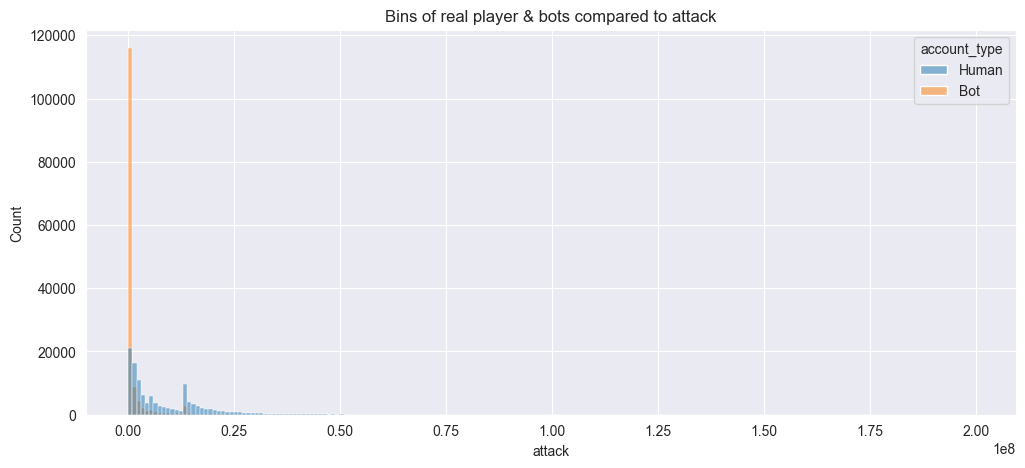

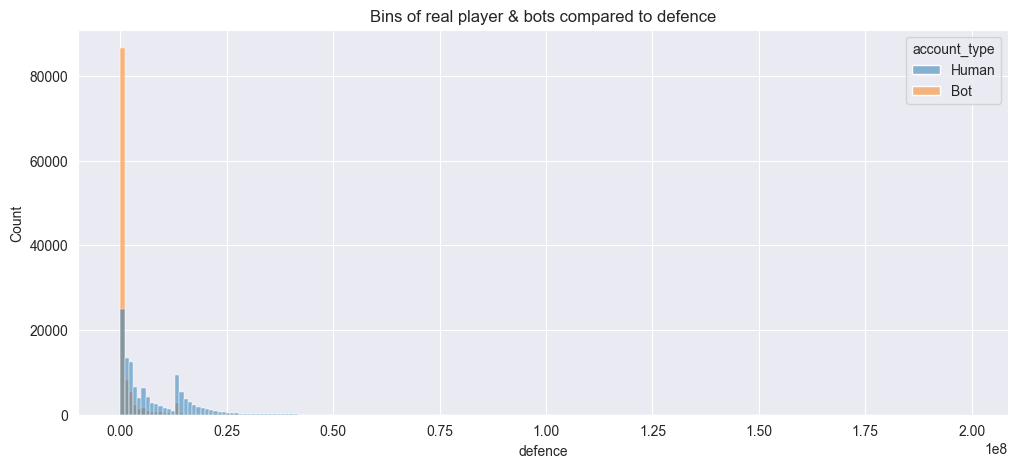

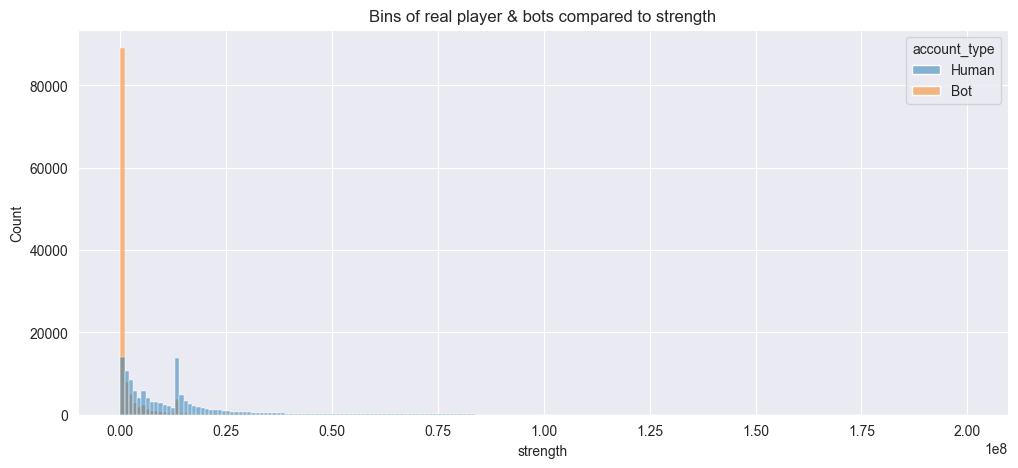

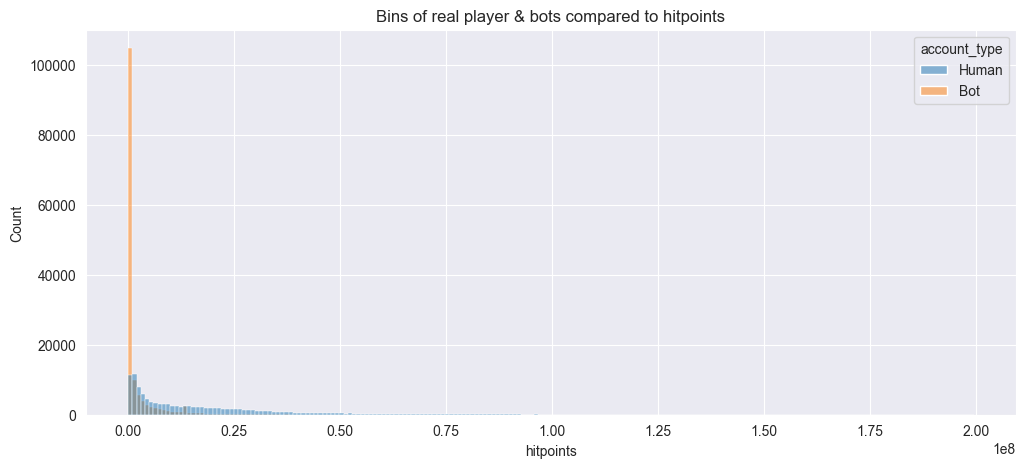

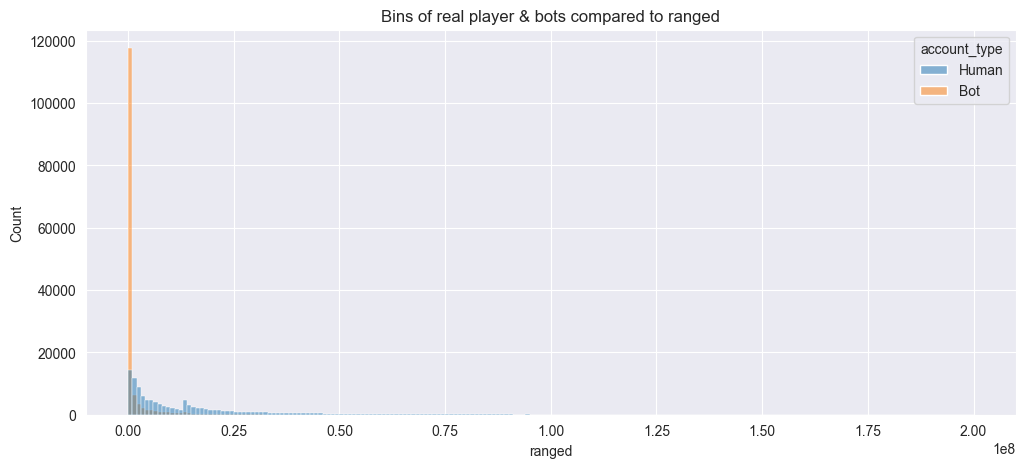

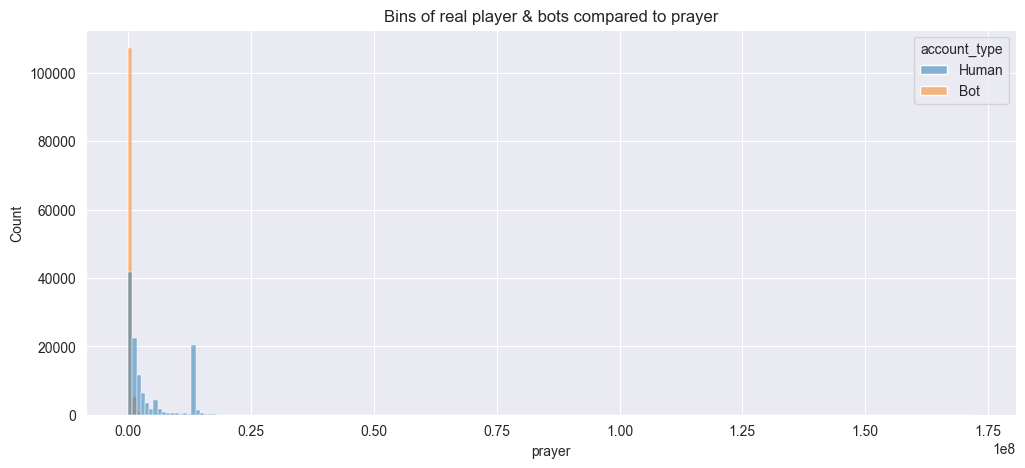

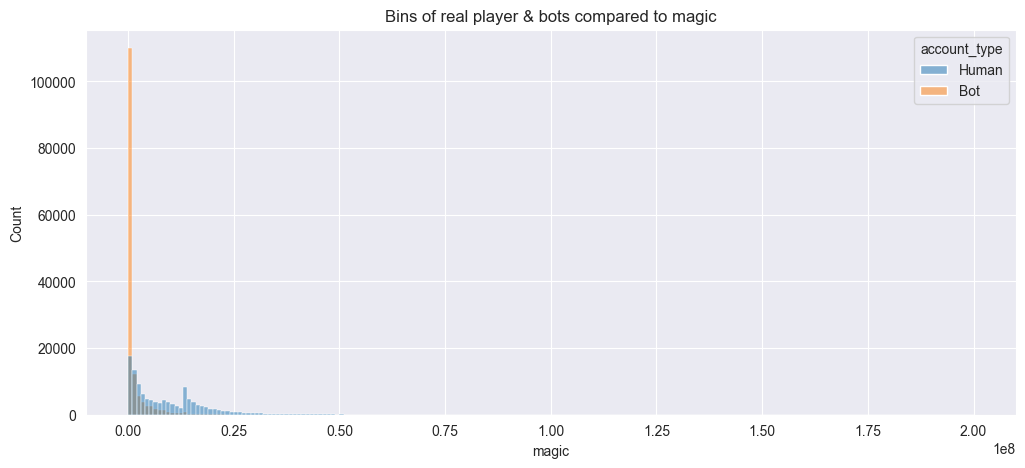

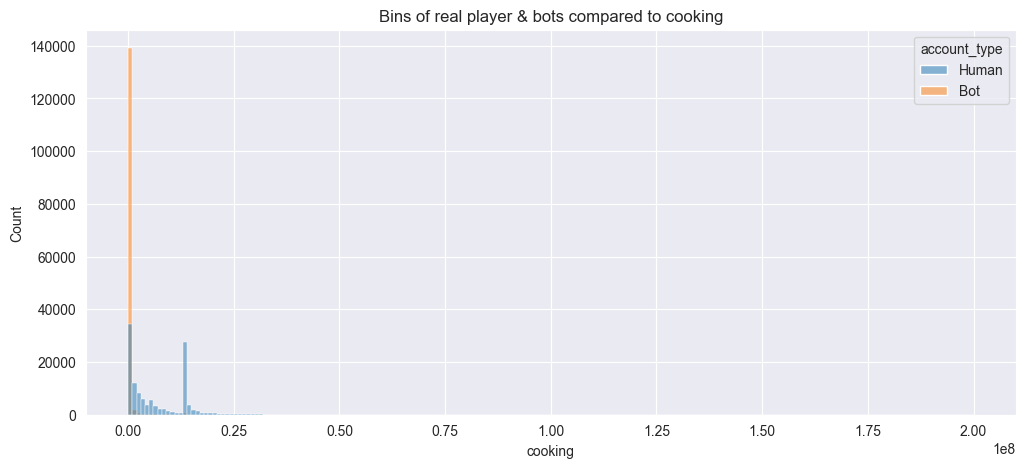

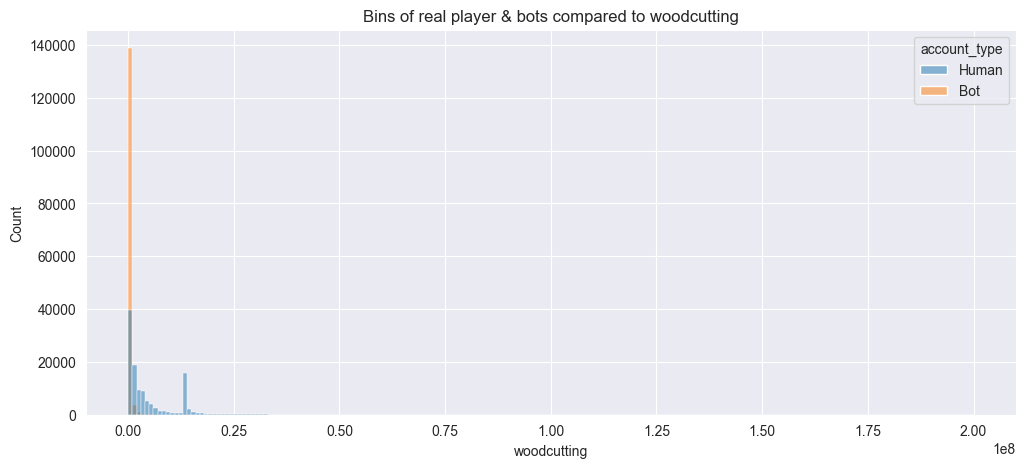

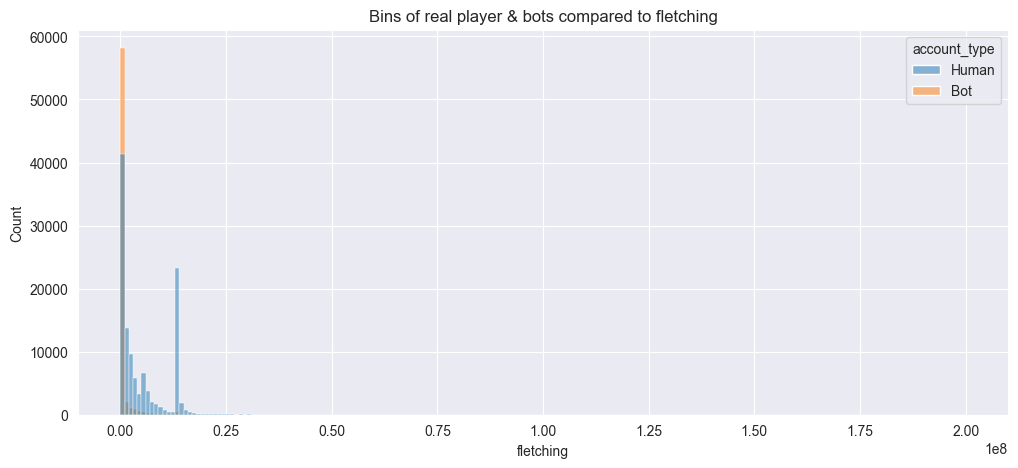

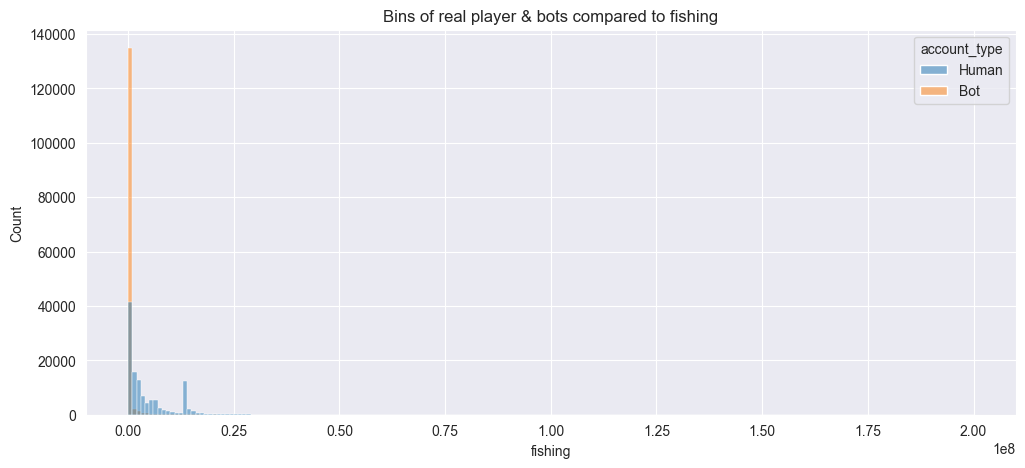

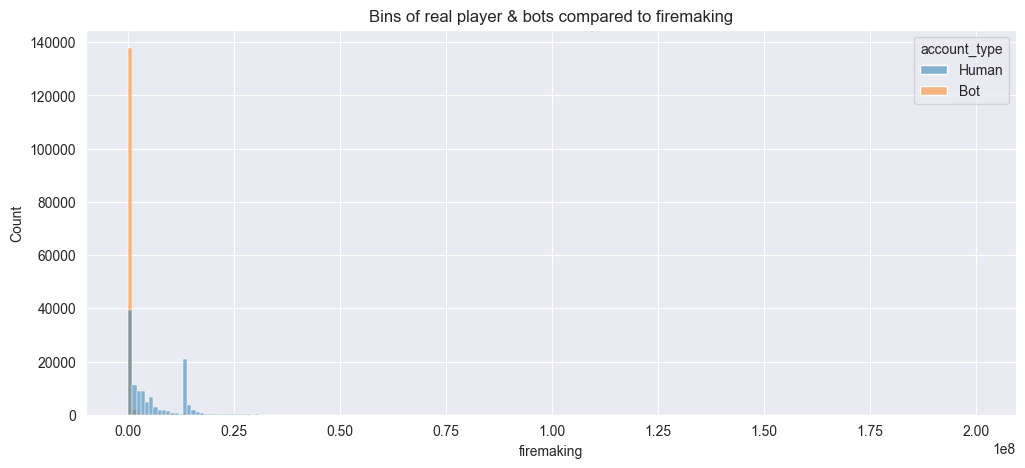

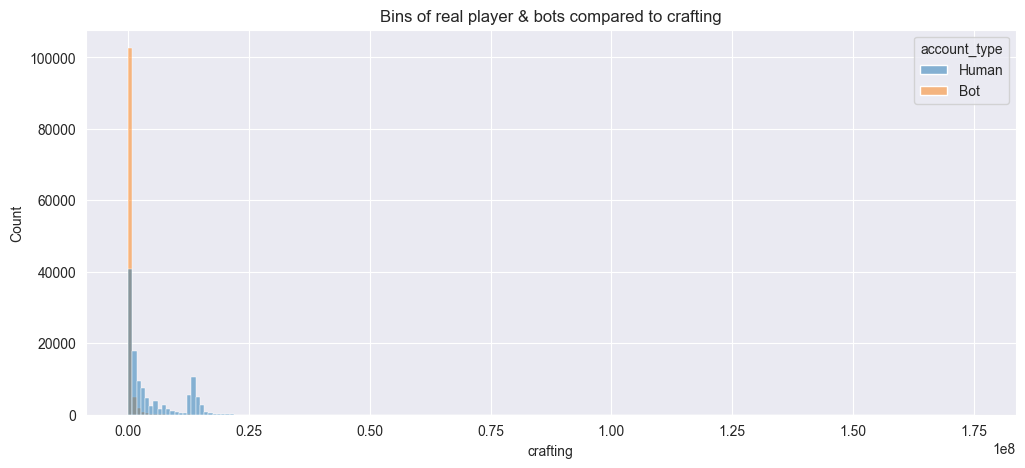

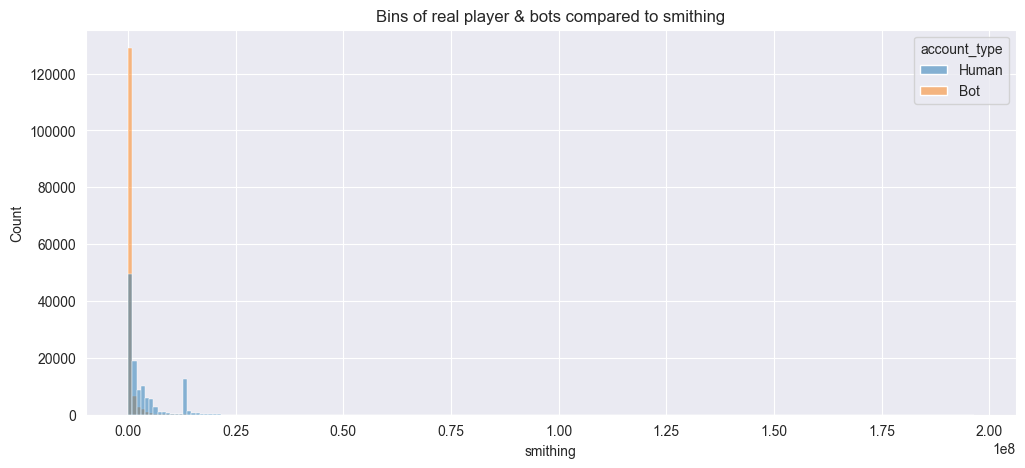

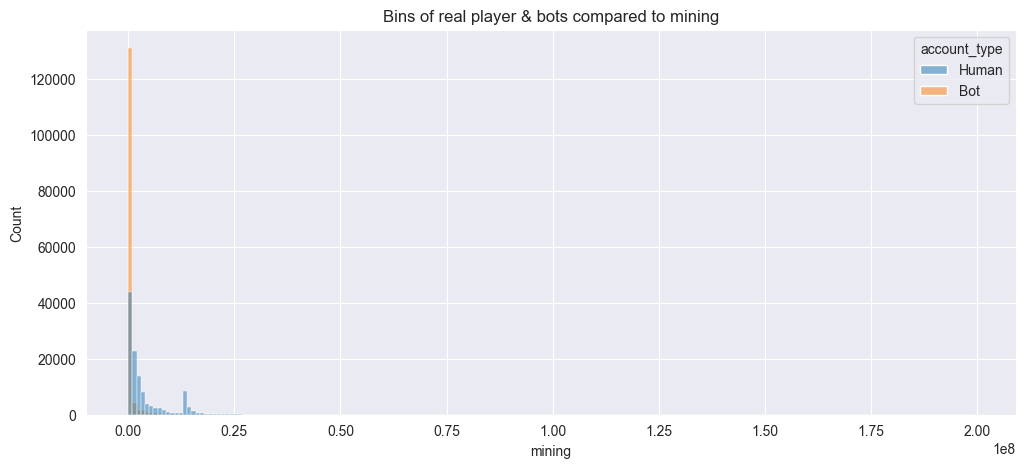

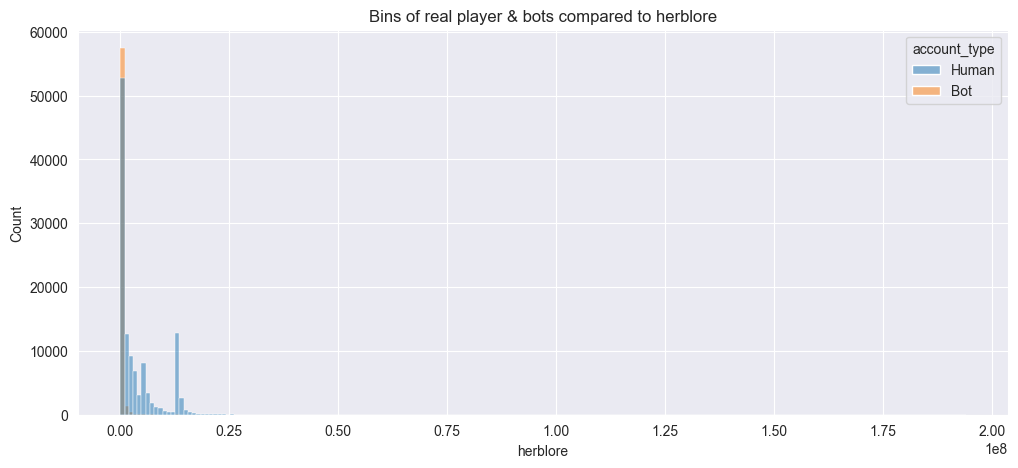

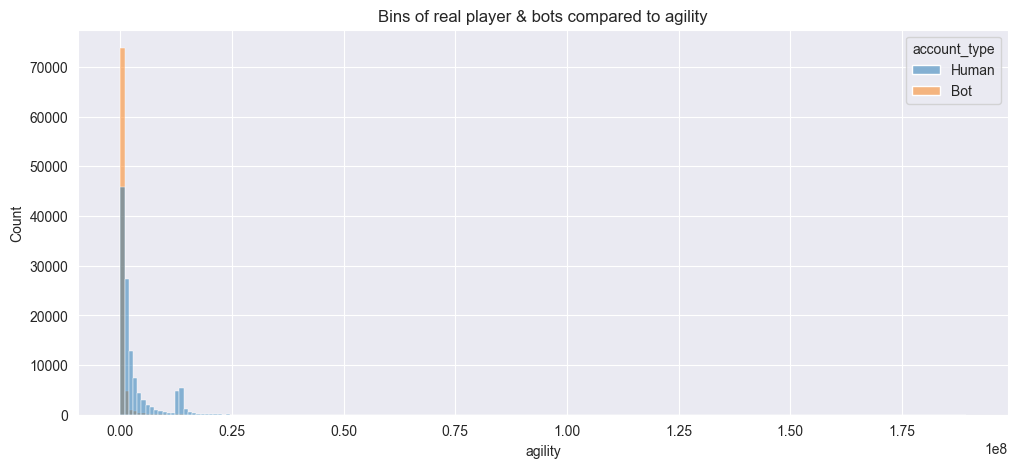

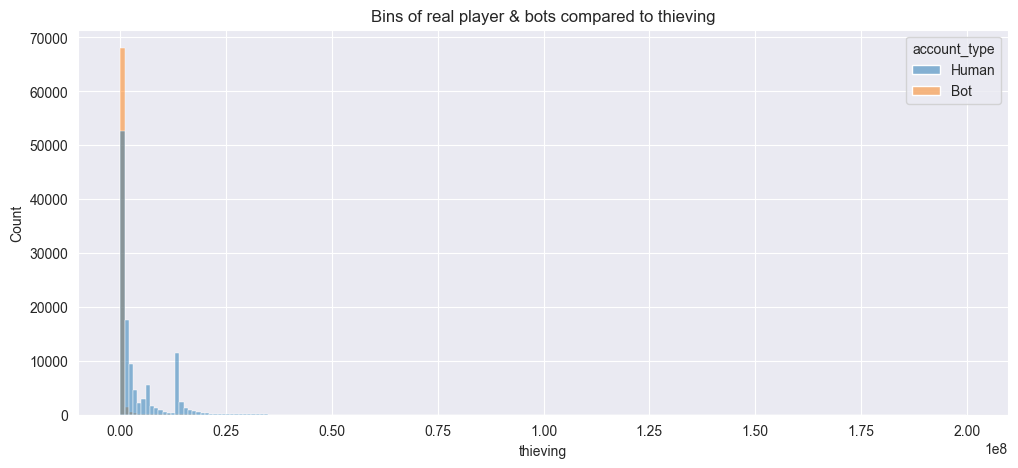

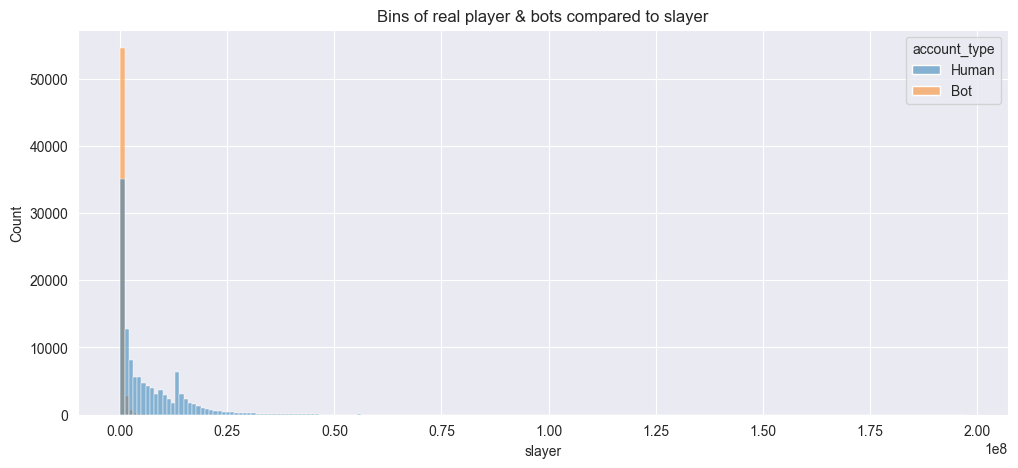

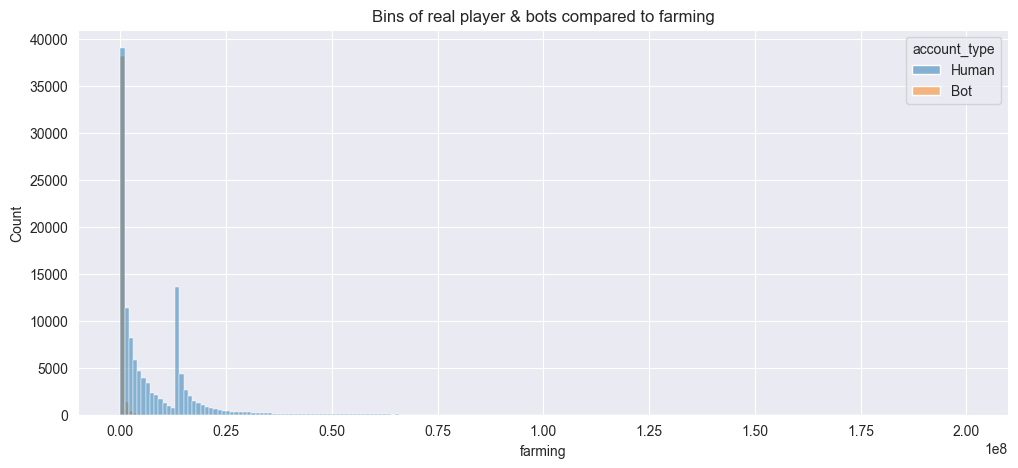

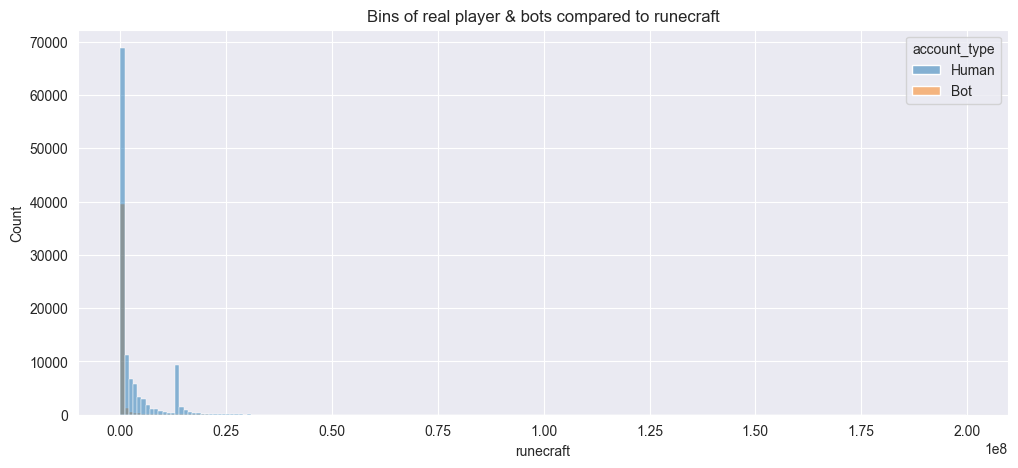

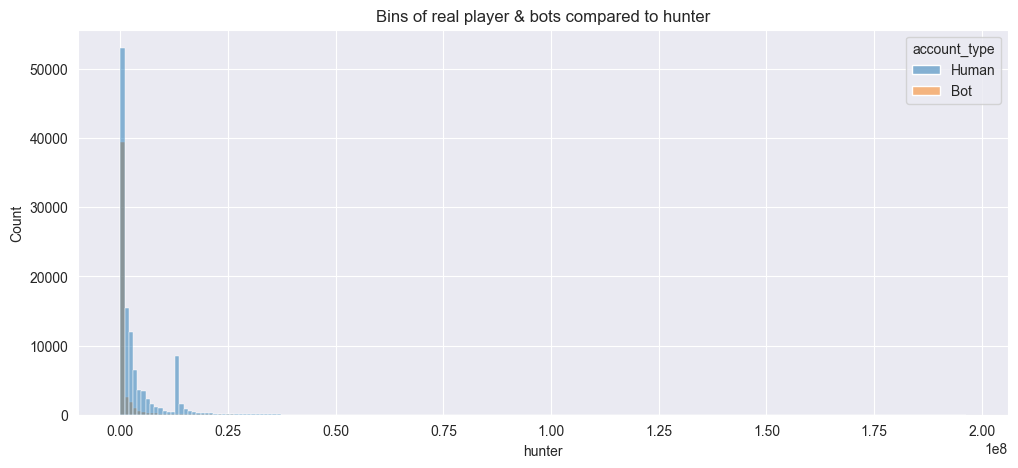

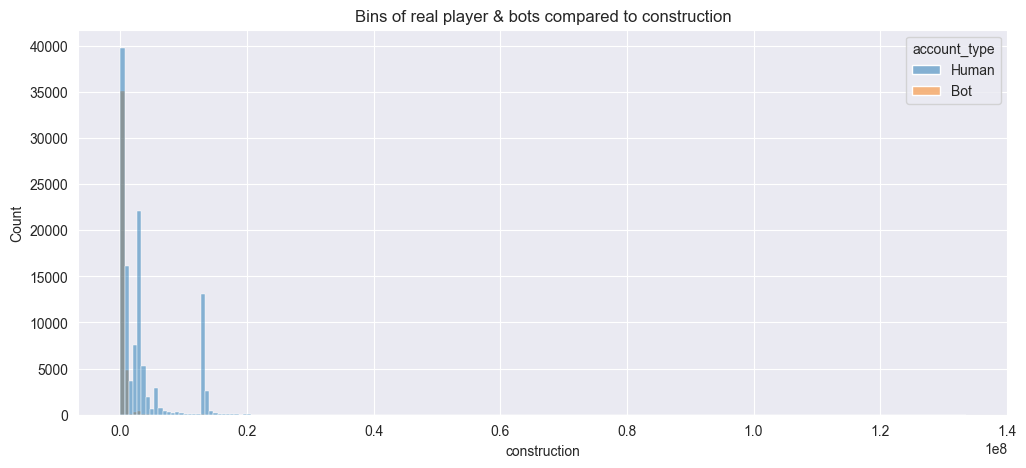

In [75]:
df_skills = df[utils.SKILLS]
_df = df_player.merge(df_skills, left_index=True, right_index=True).copy()
for skill in df_skills.columns:
    if skill != "total":
        query = f"{skill} > 0 and {skill} < 200000000"
    compare_ratio(skill, _df.query(query).copy())


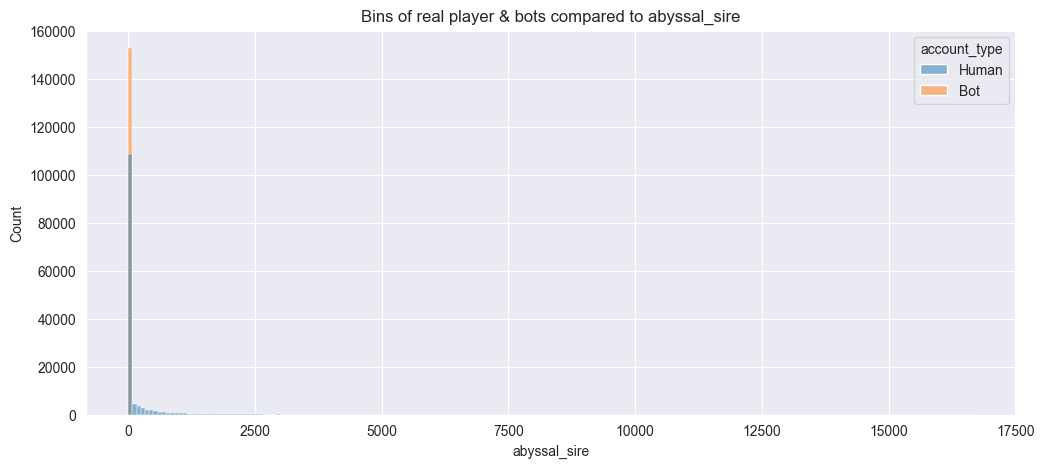

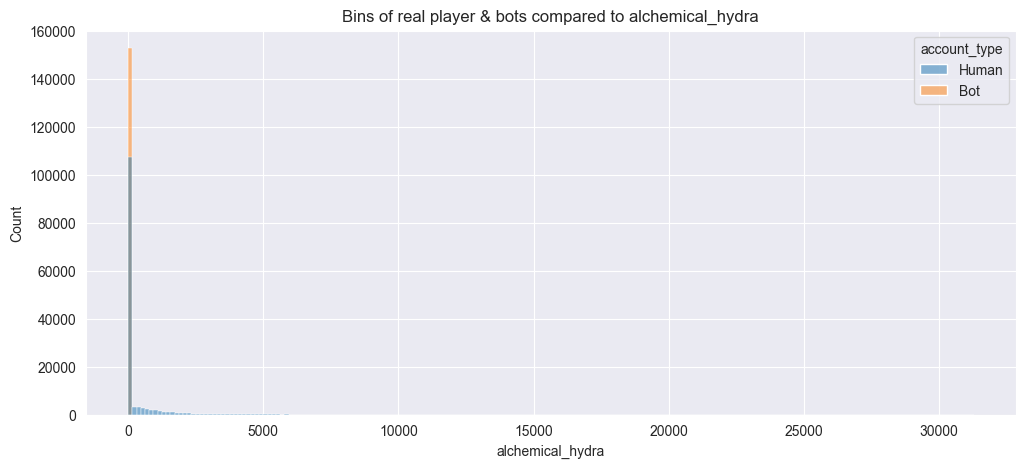

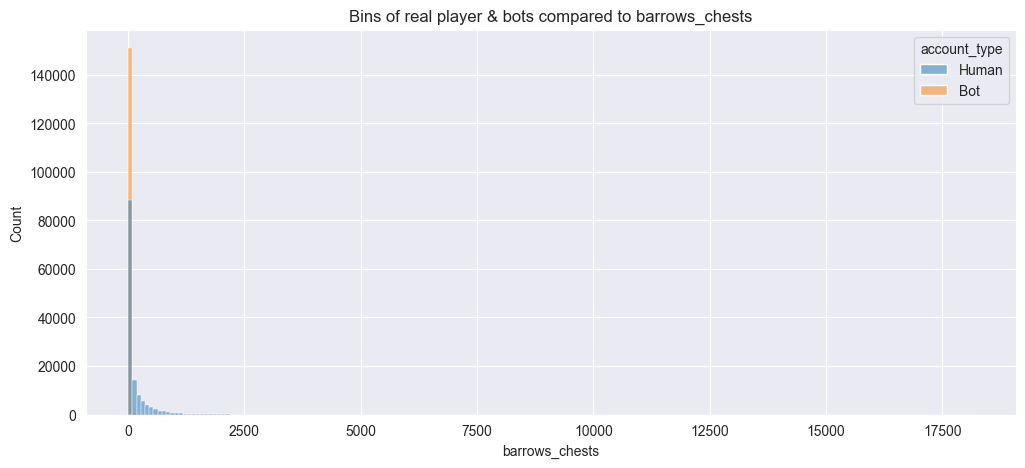

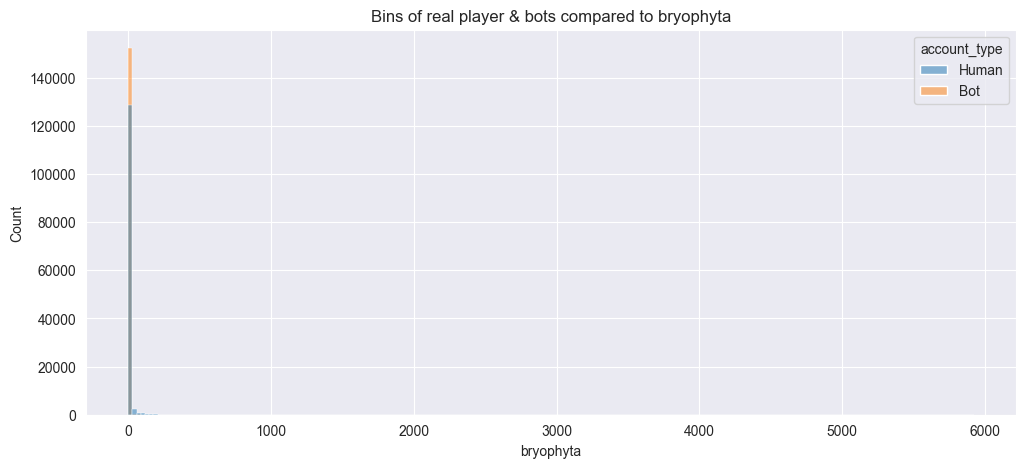

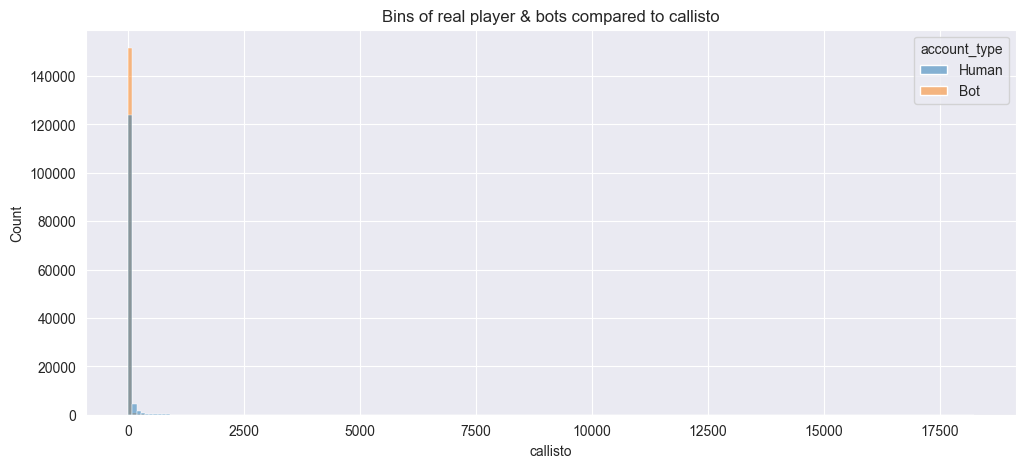

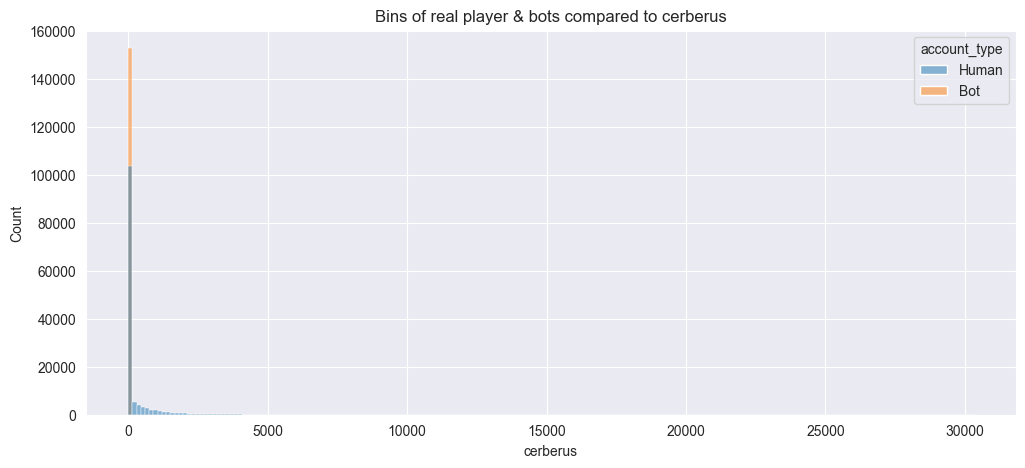

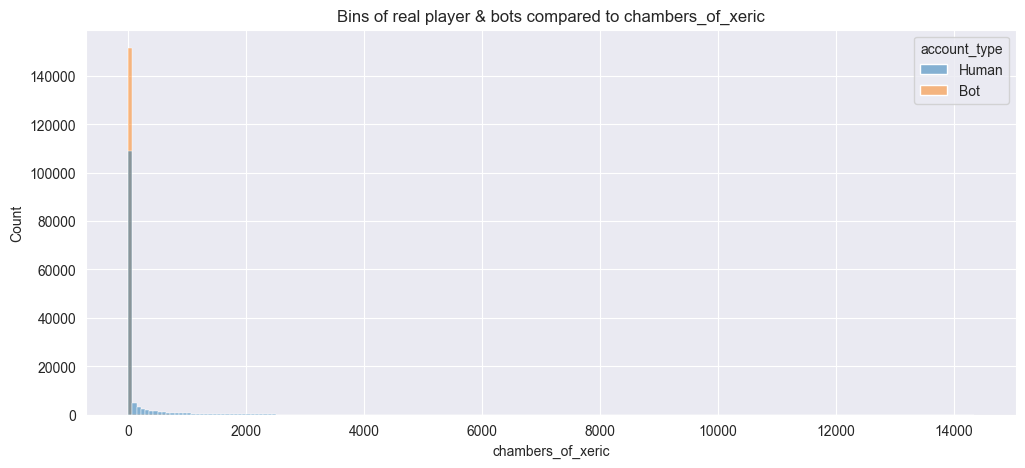

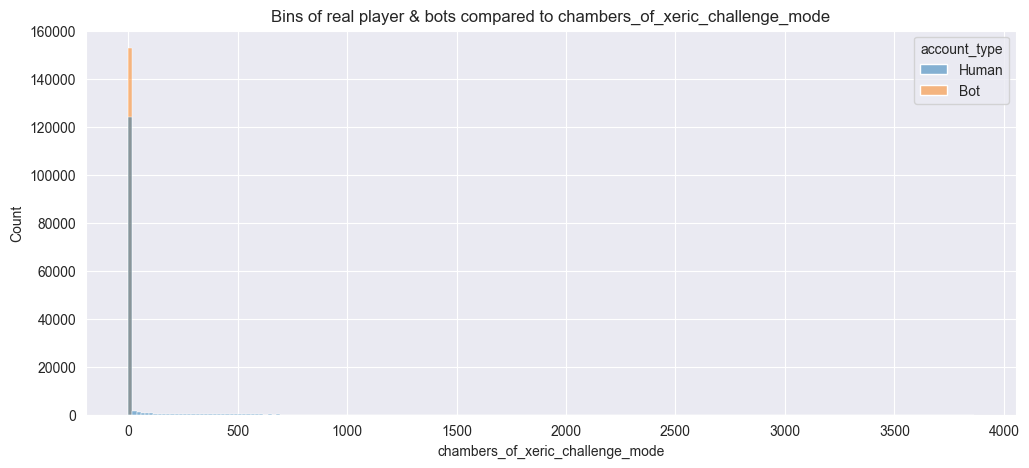

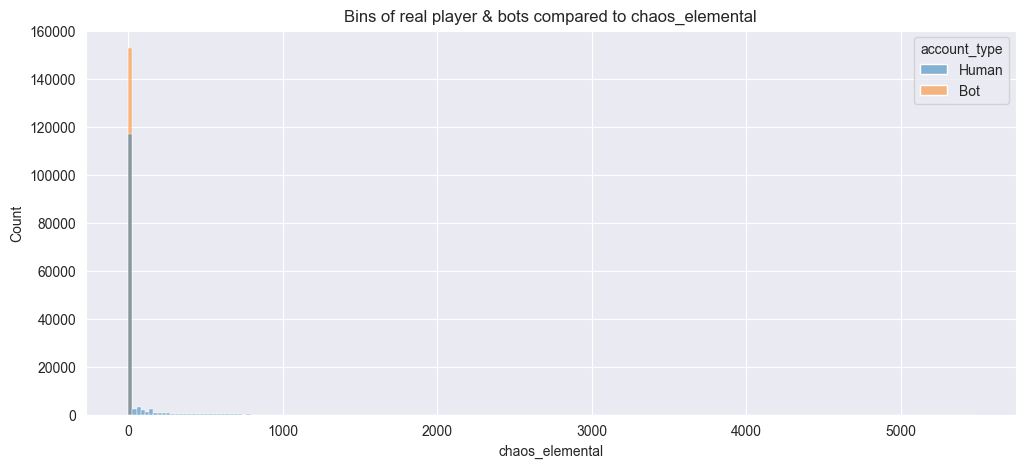

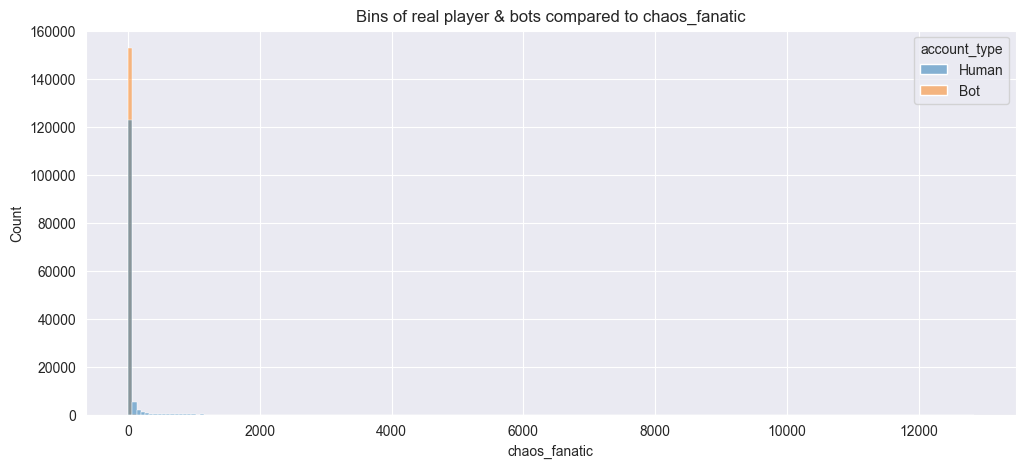

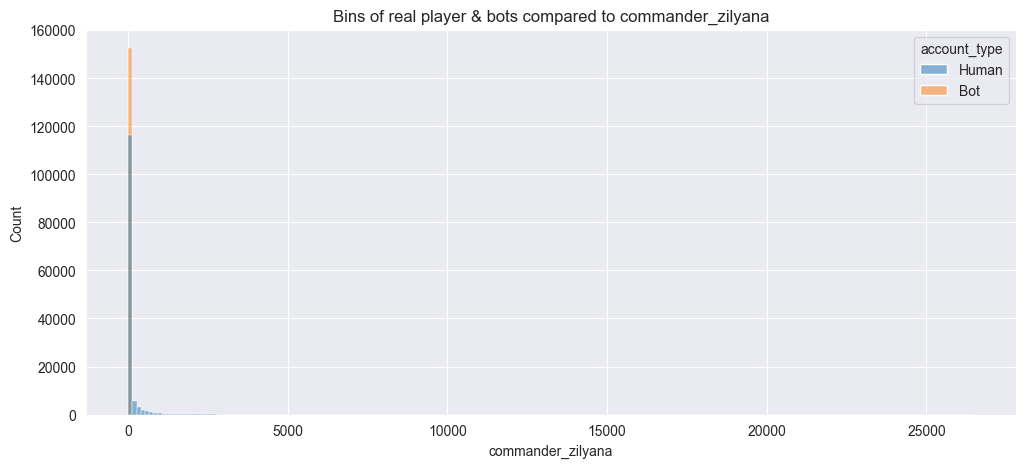

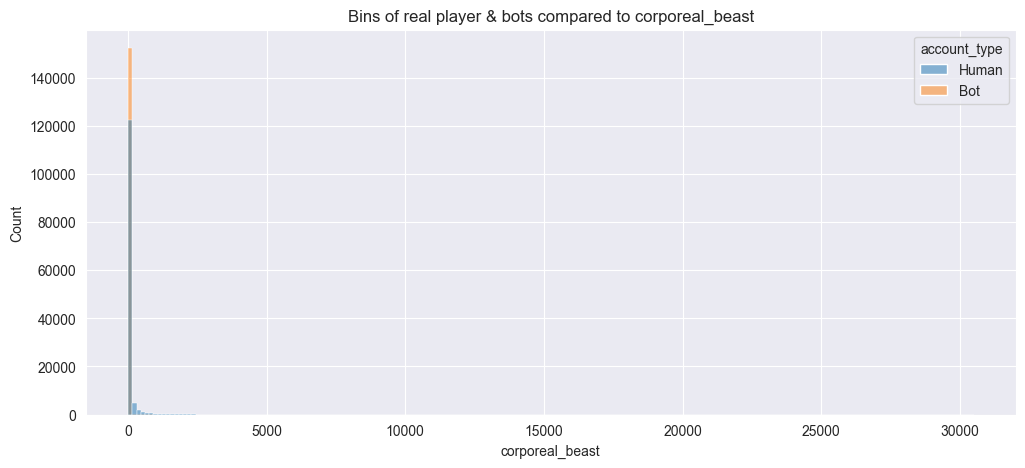

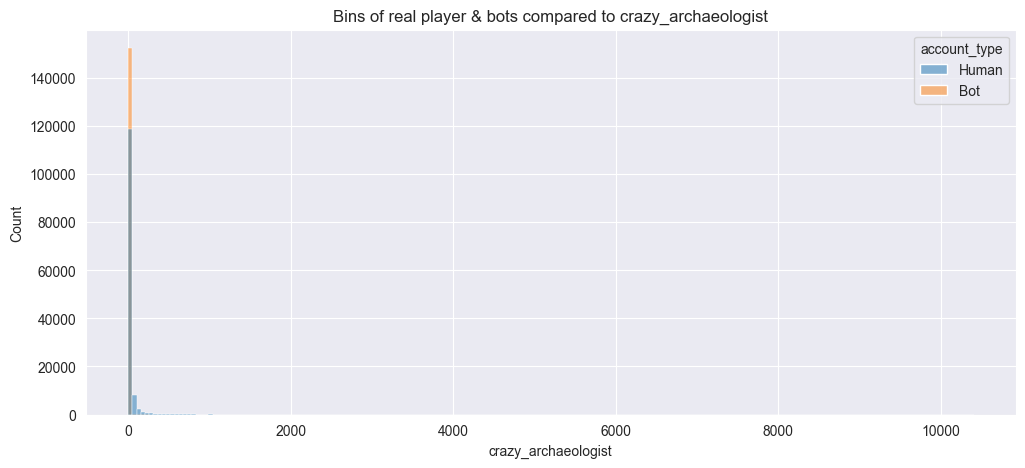

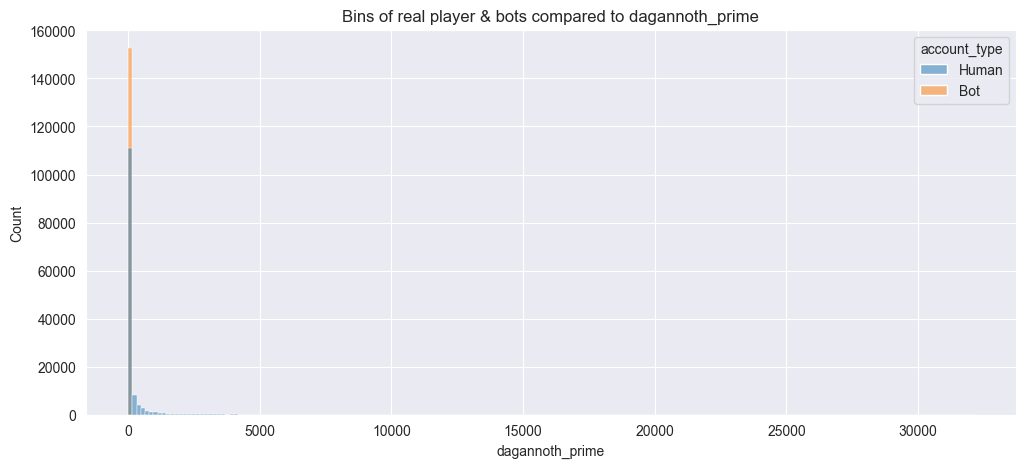

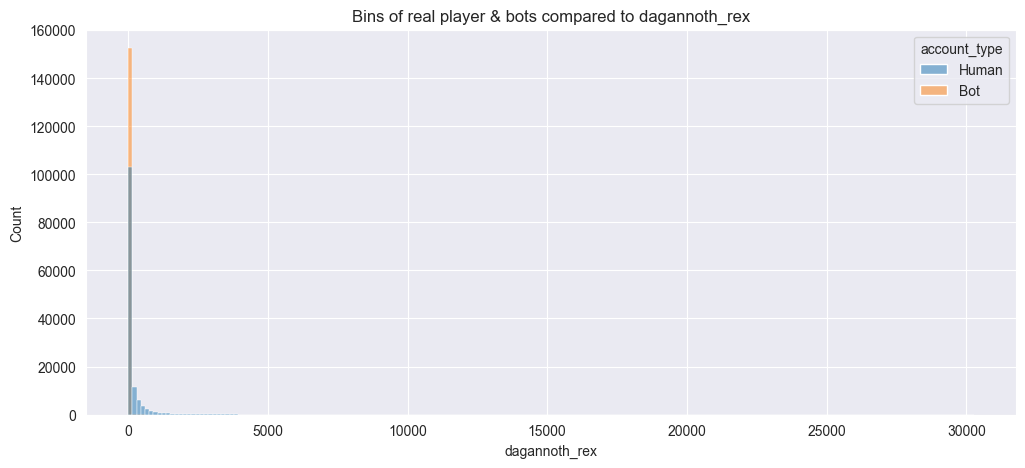

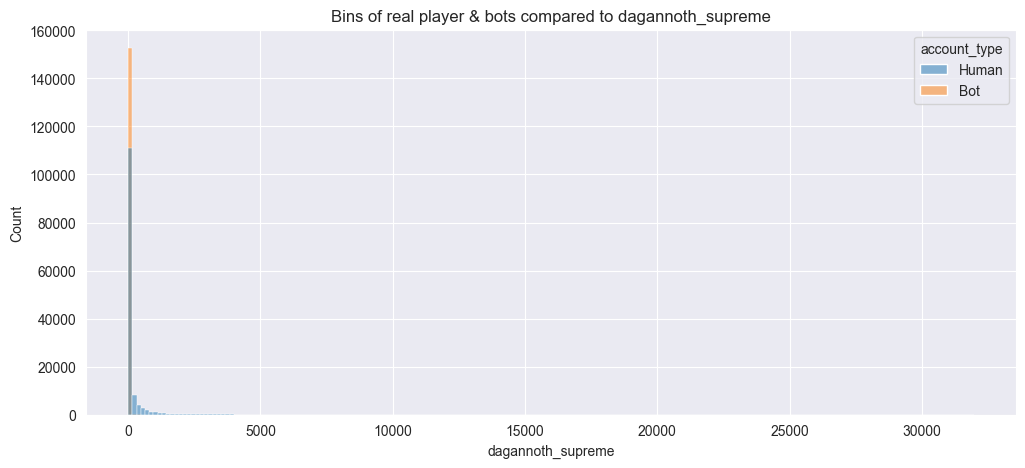

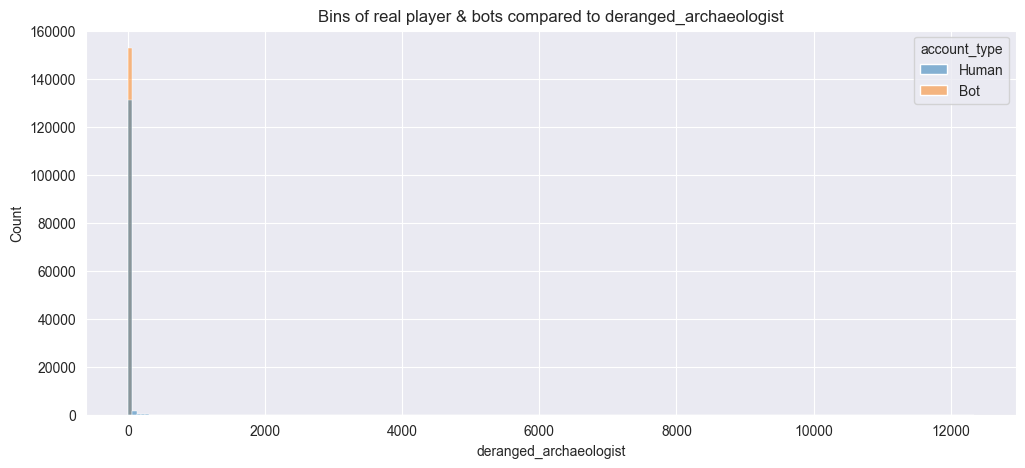

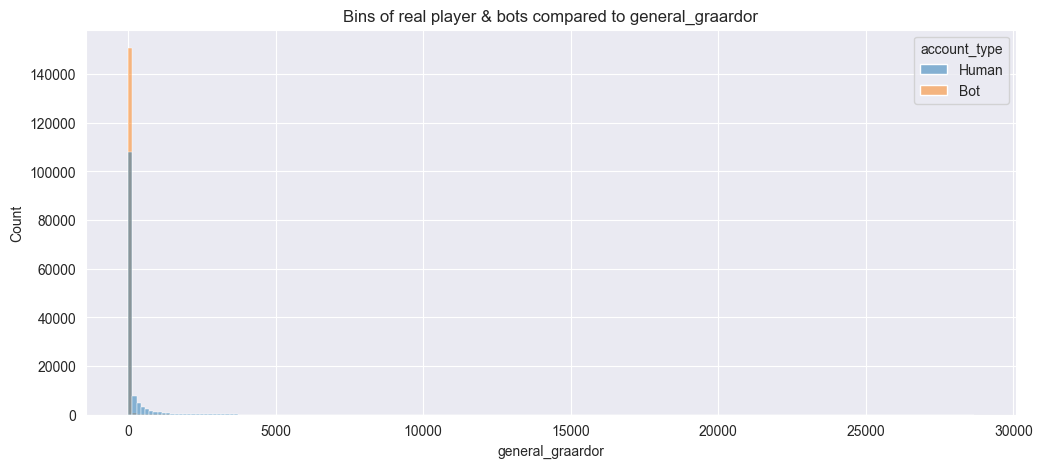

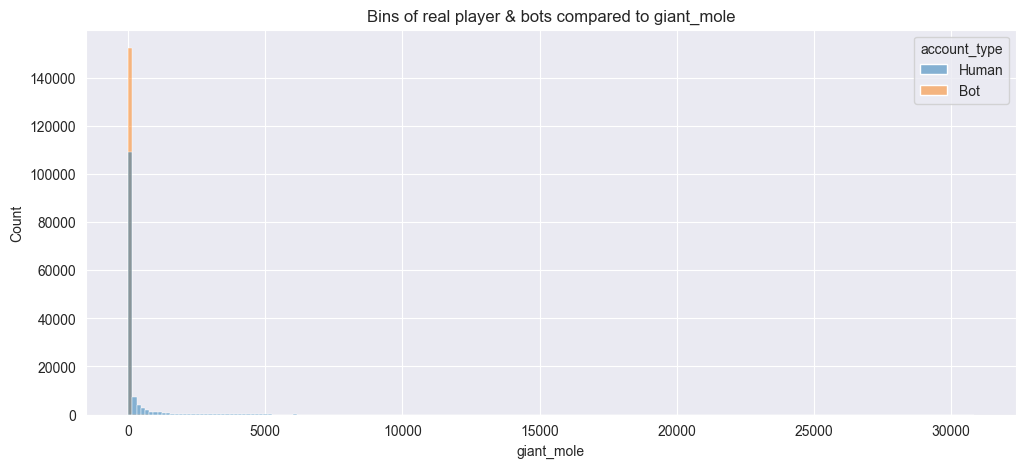

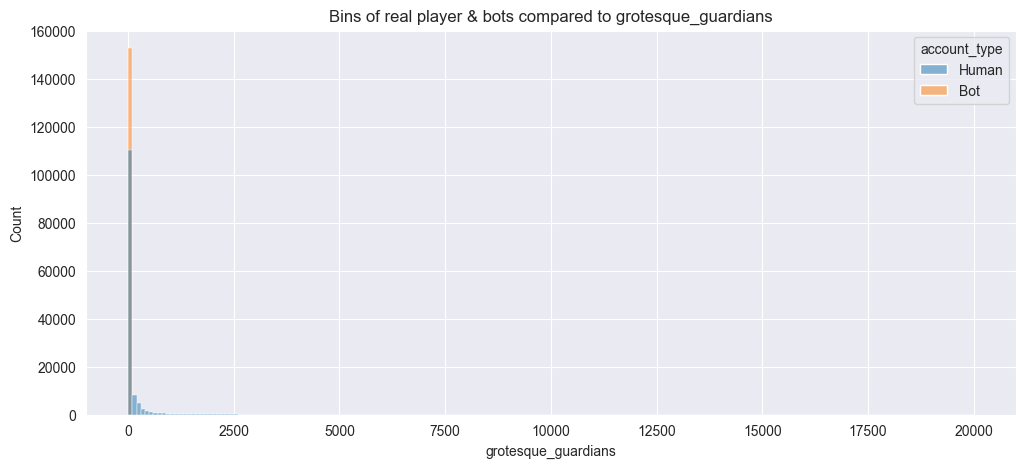

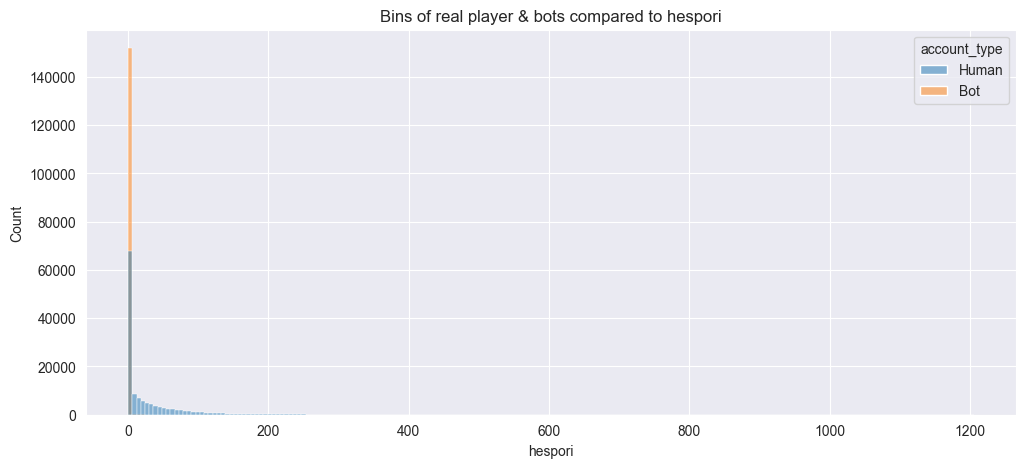

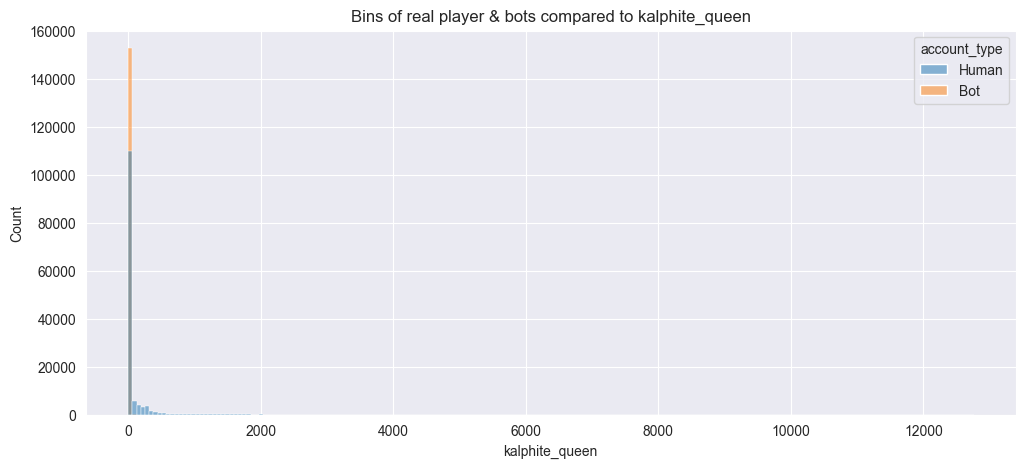

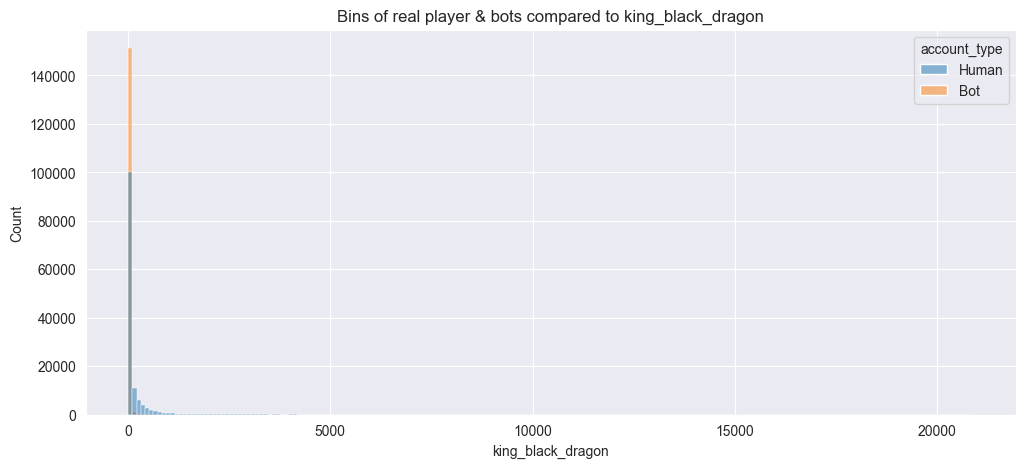

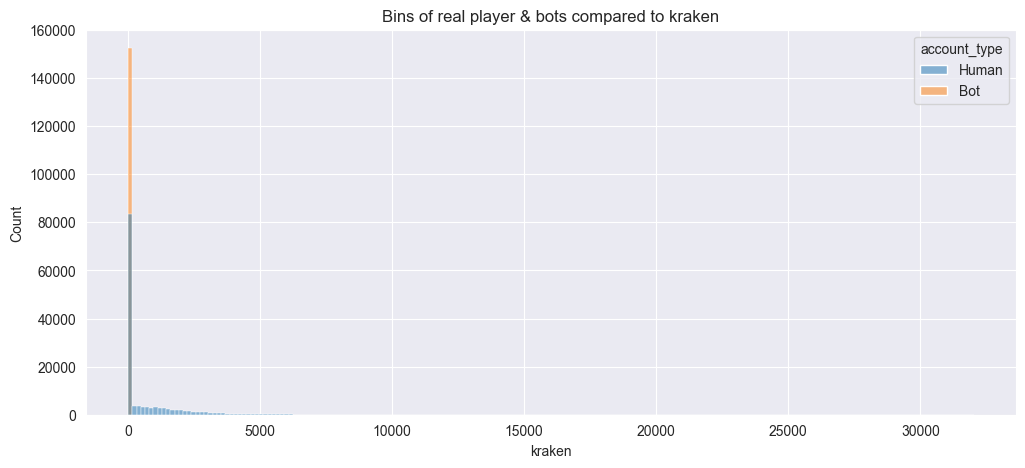

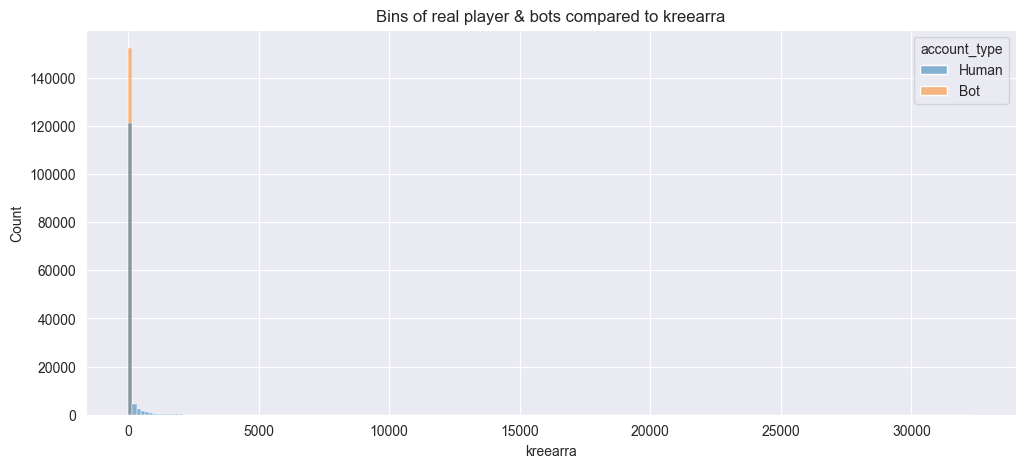

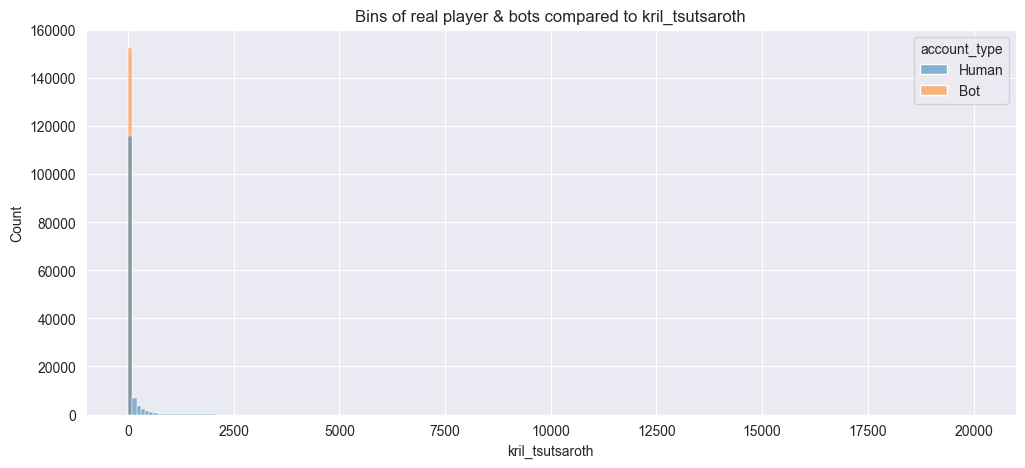

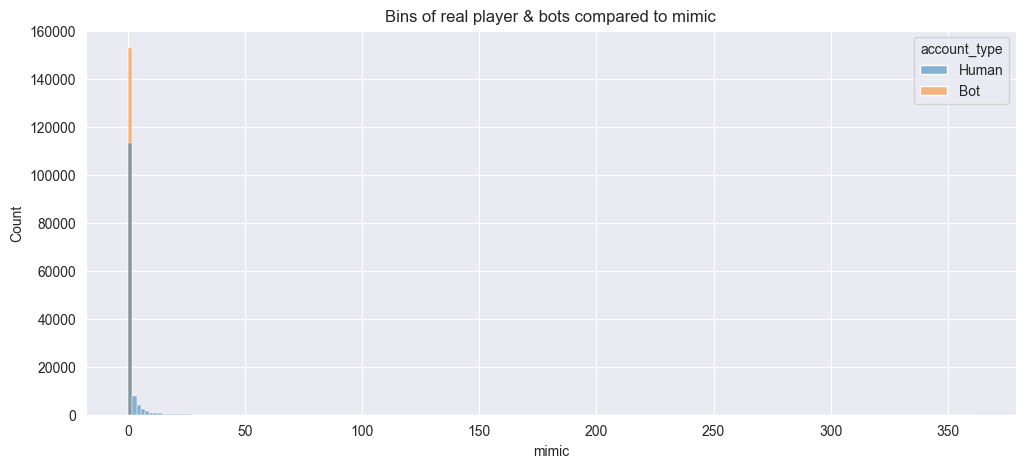

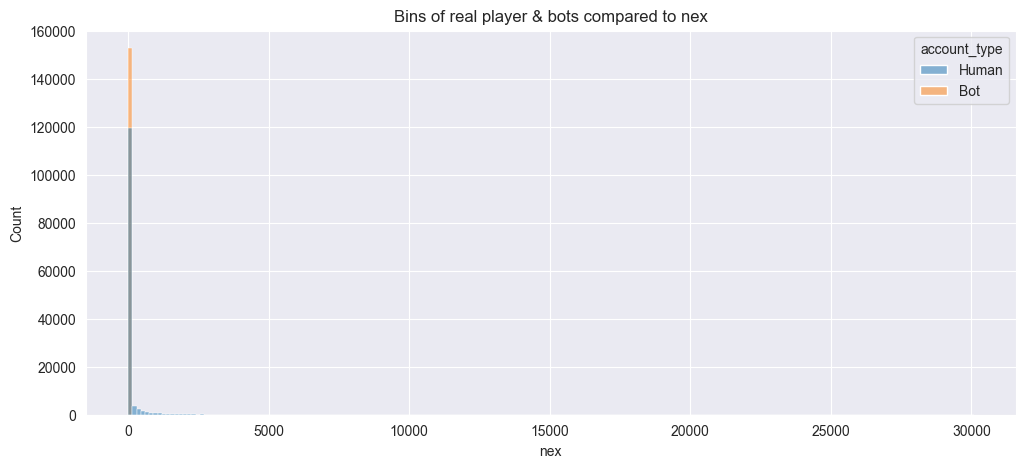

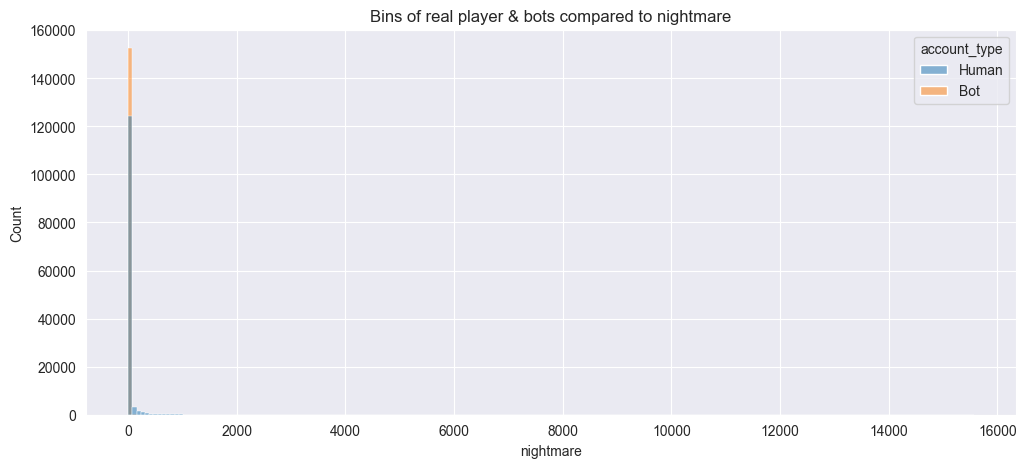

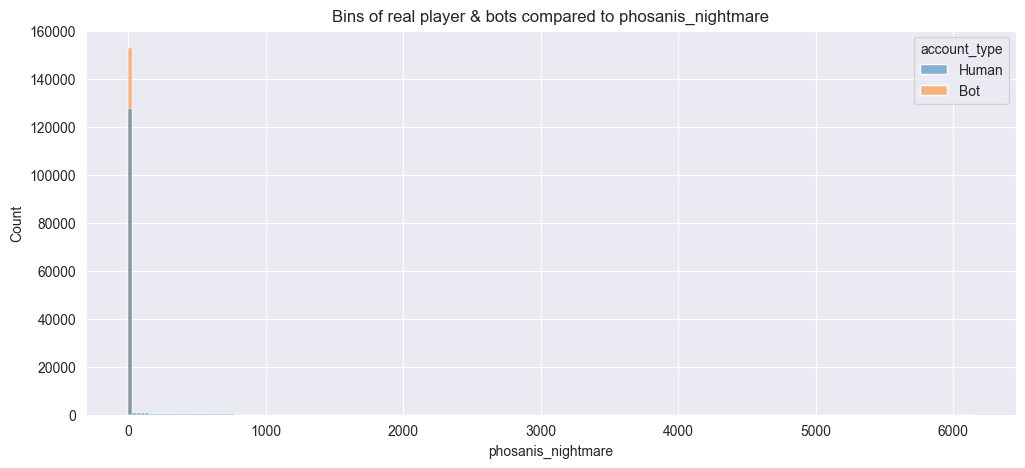

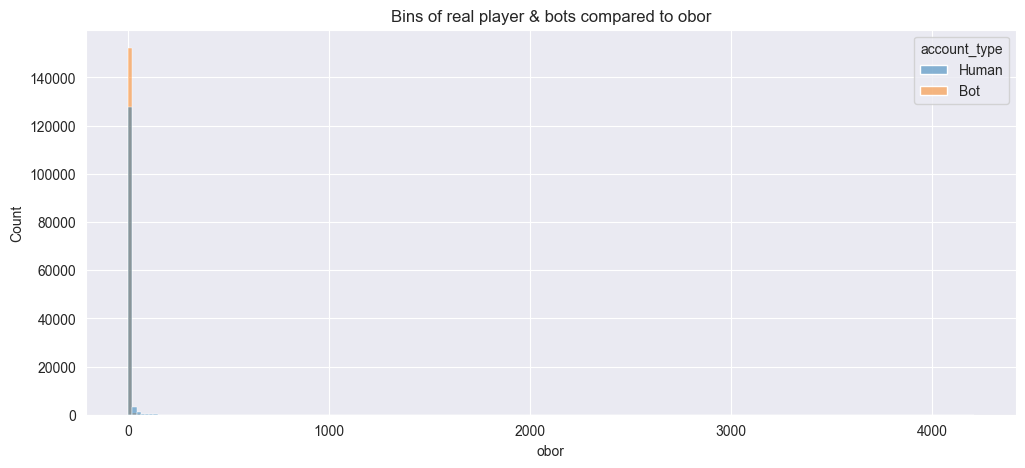

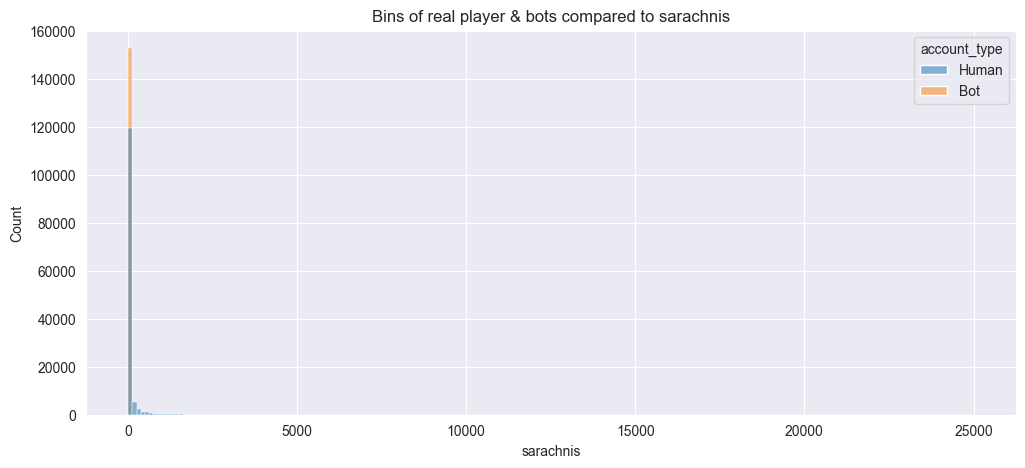

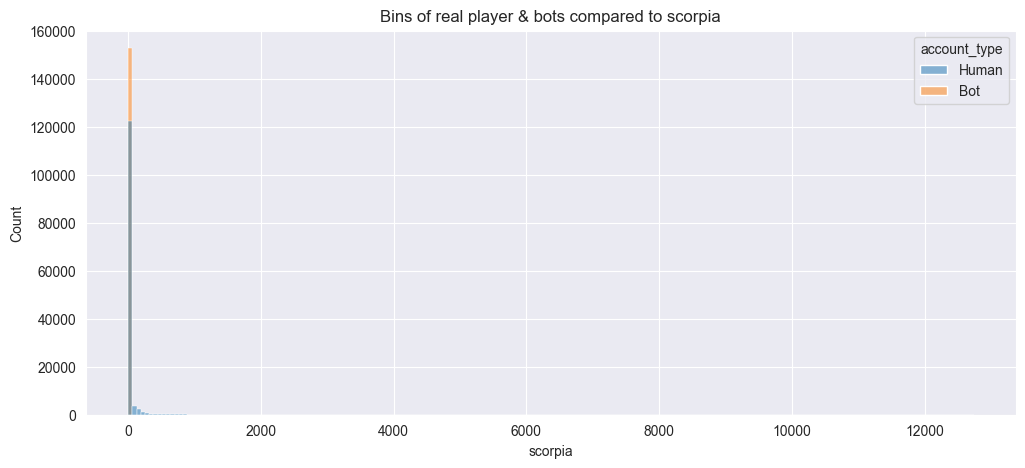

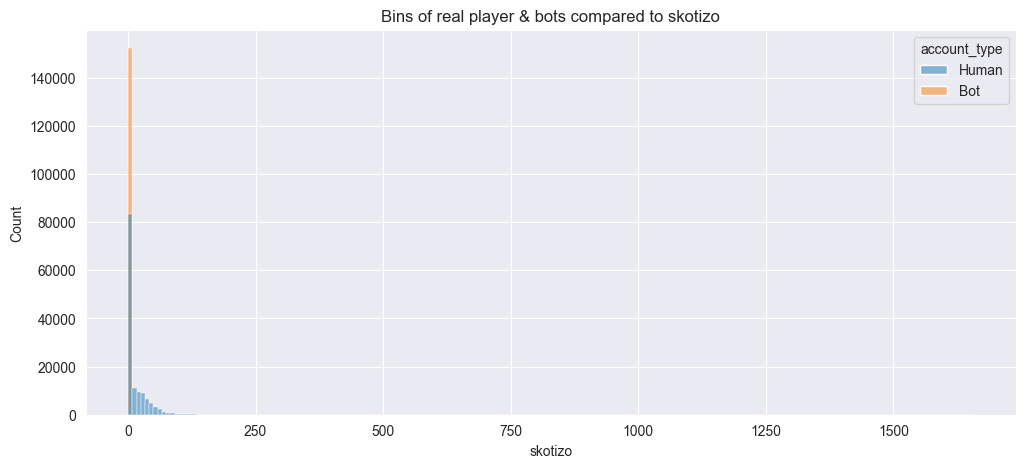

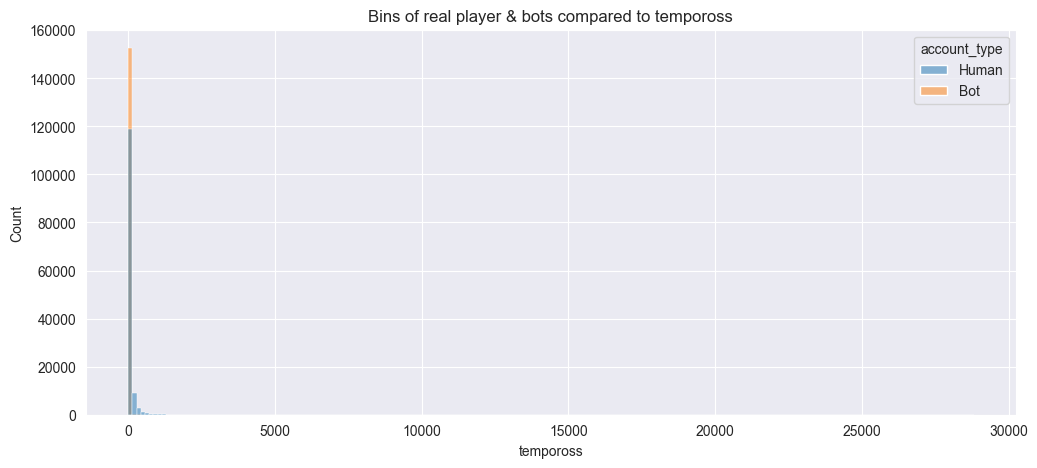

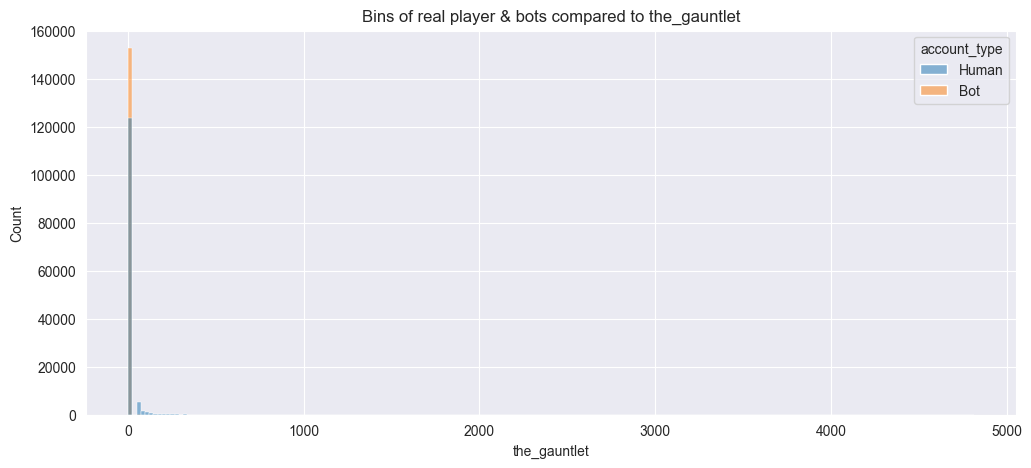

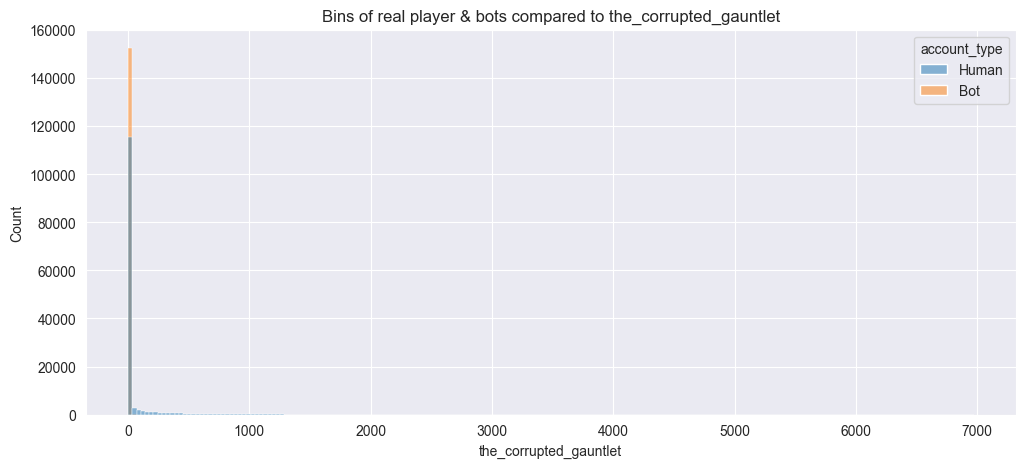

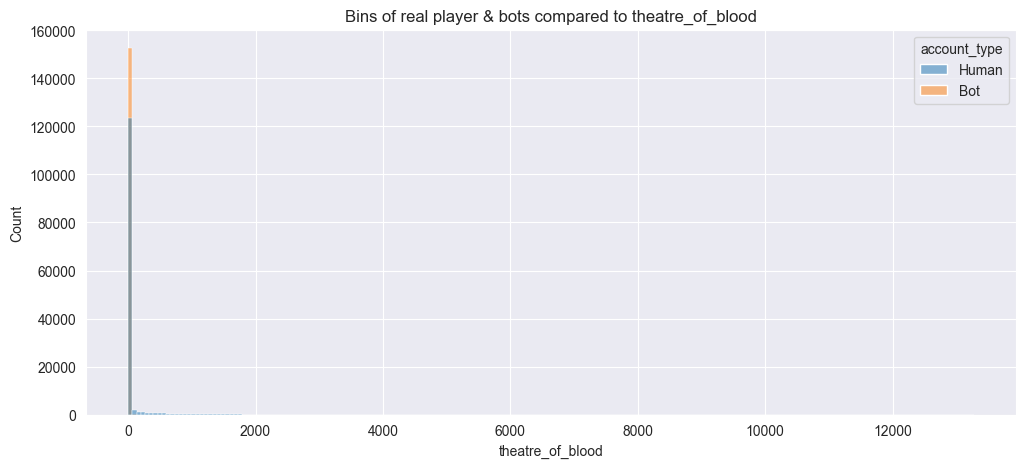

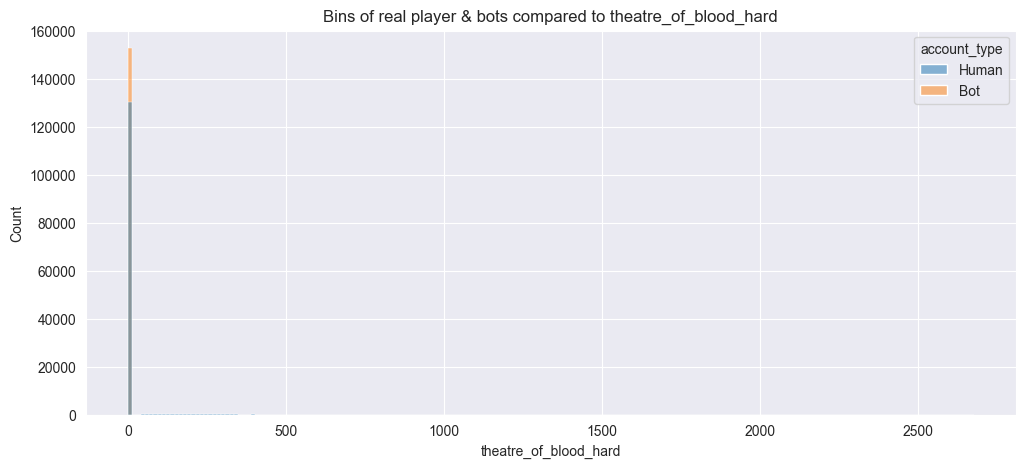

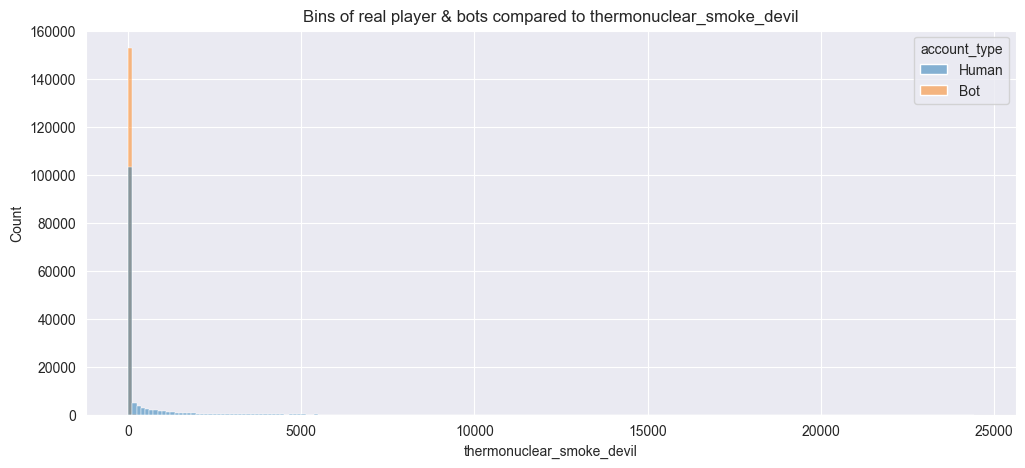

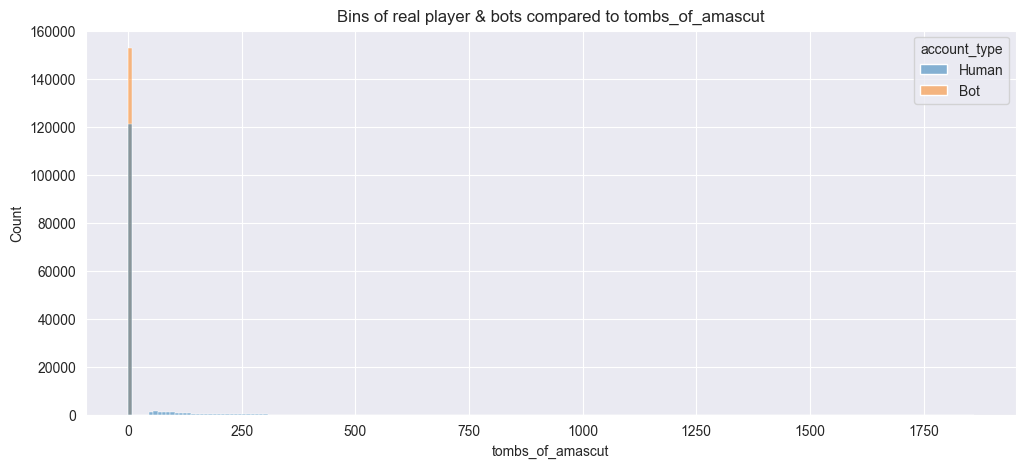

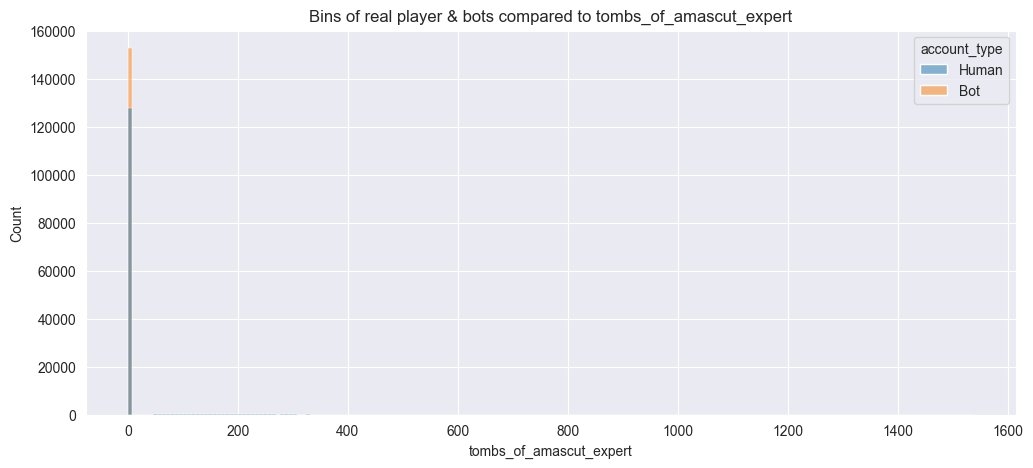

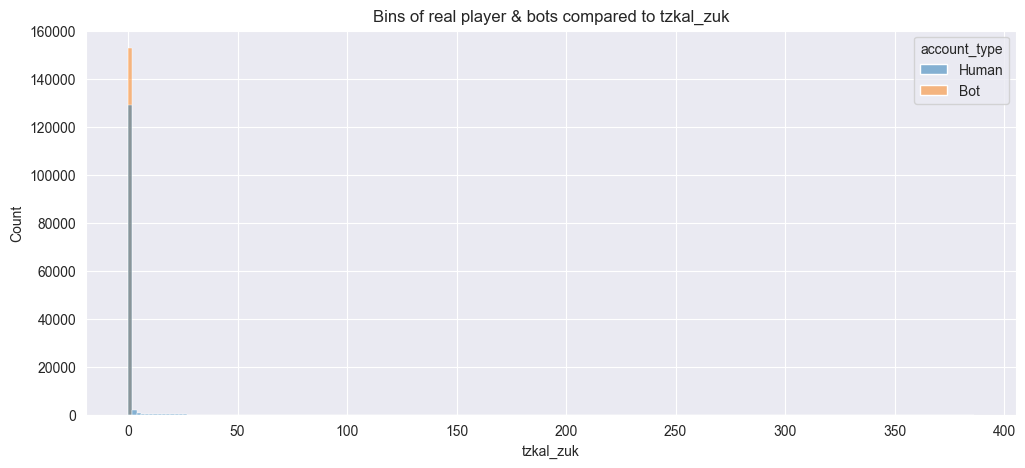

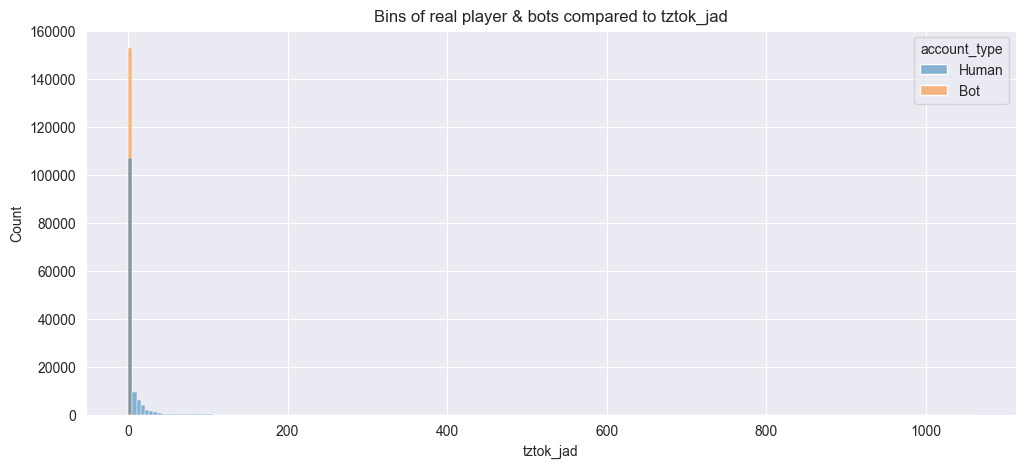

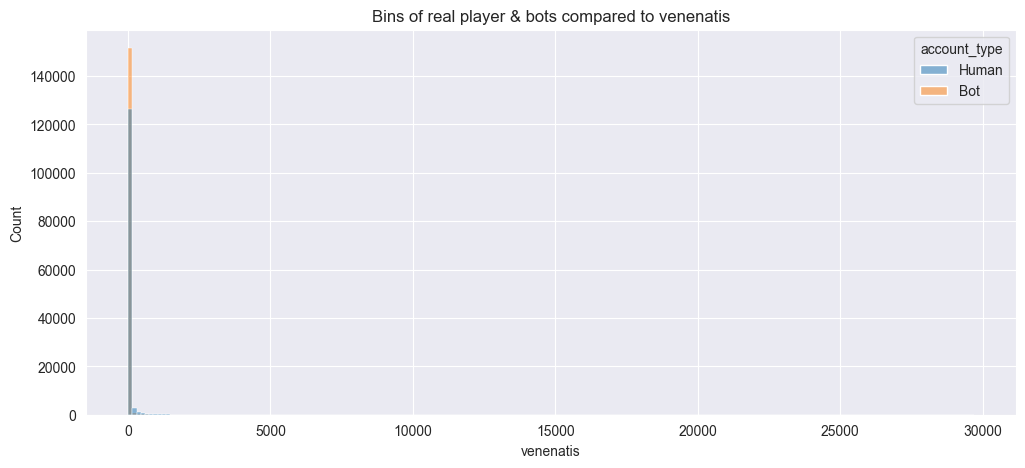

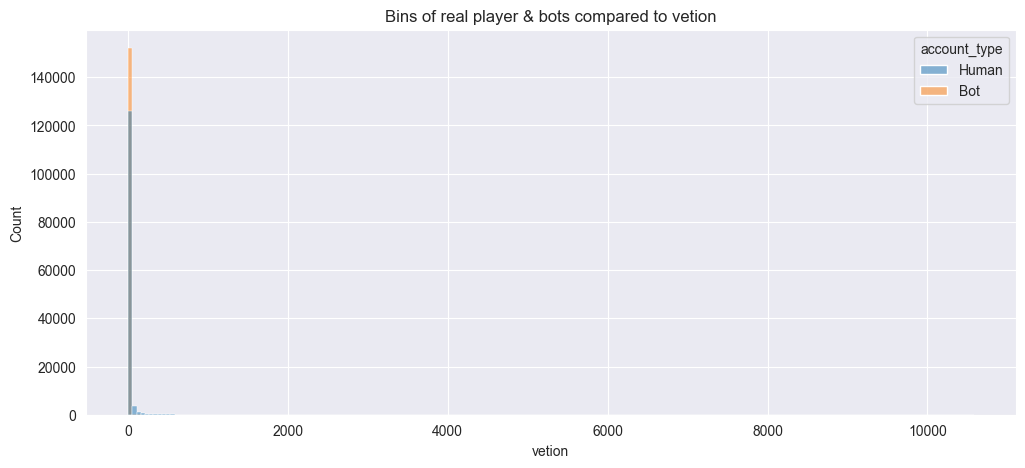

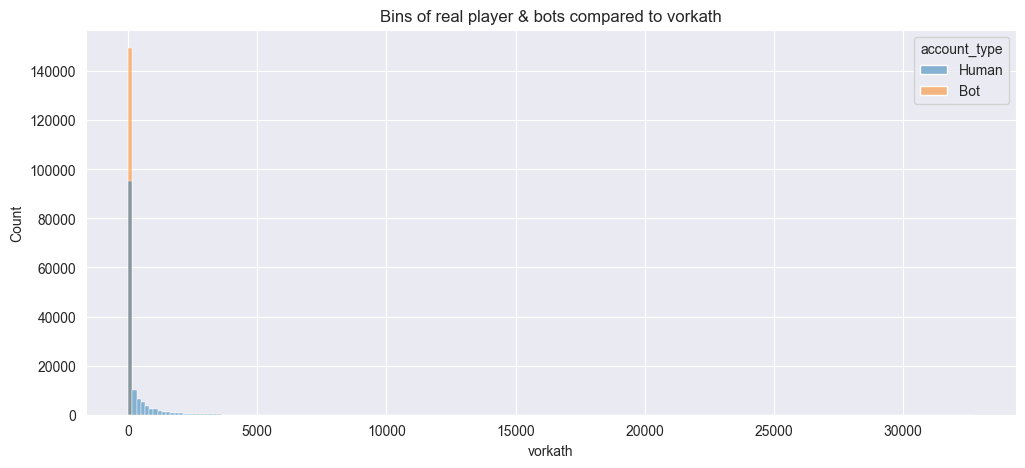

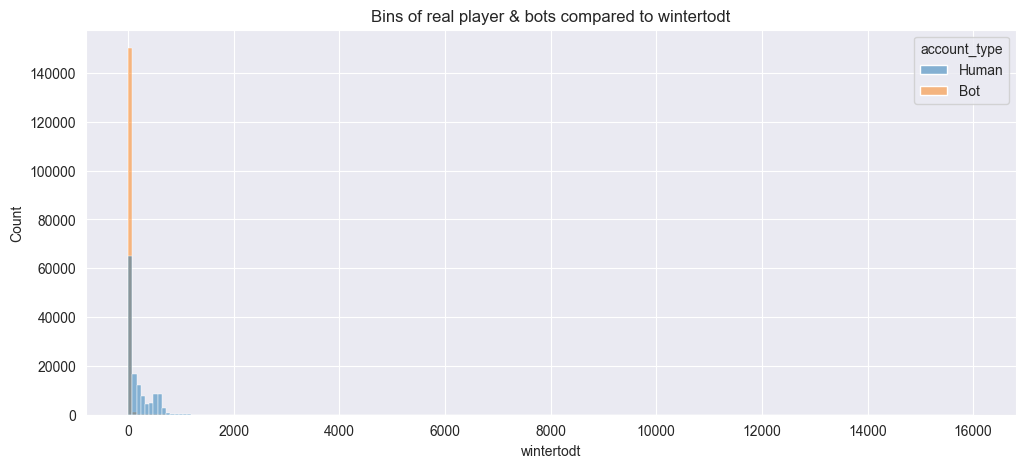

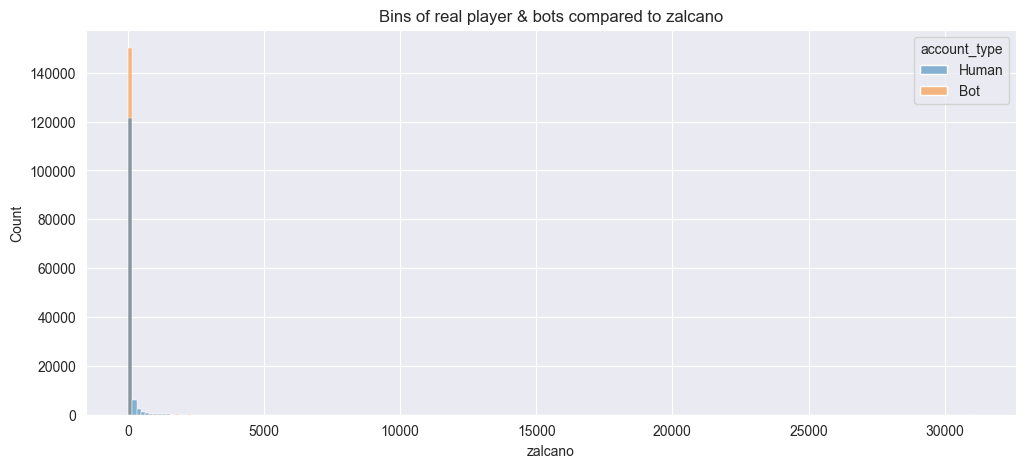

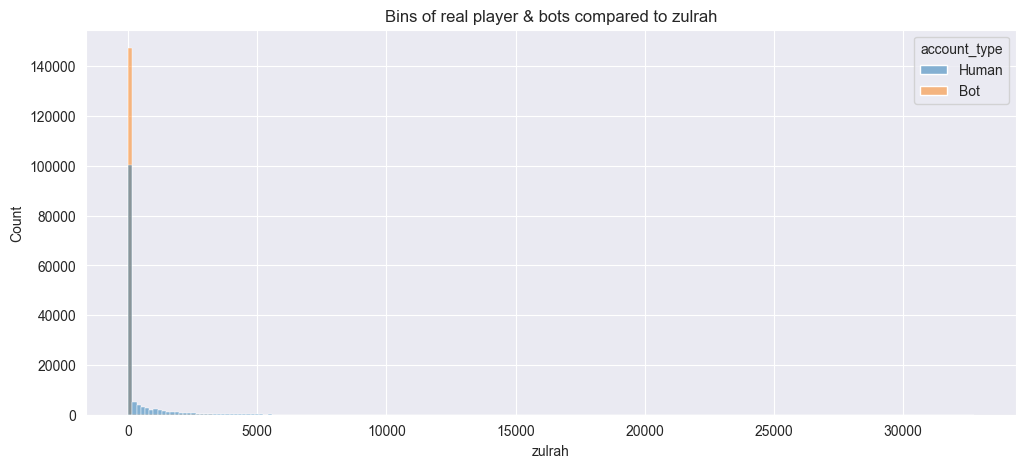

In [76]:
df_bosses = df[utils.BOSSES]
_df = df_player.merge(df_bosses, left_index=True, right_index=True).copy()
for boss in df_bosses.columns:
    compare_ratio(boss, _df.copy())

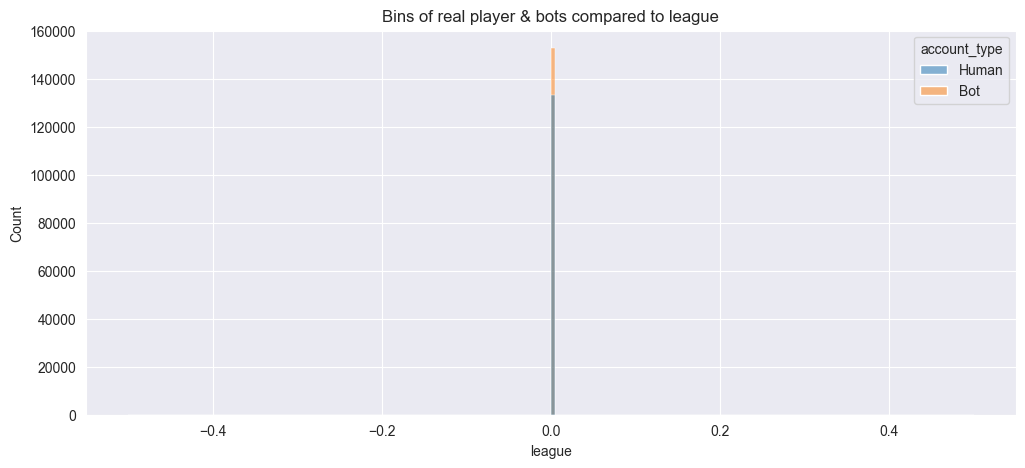

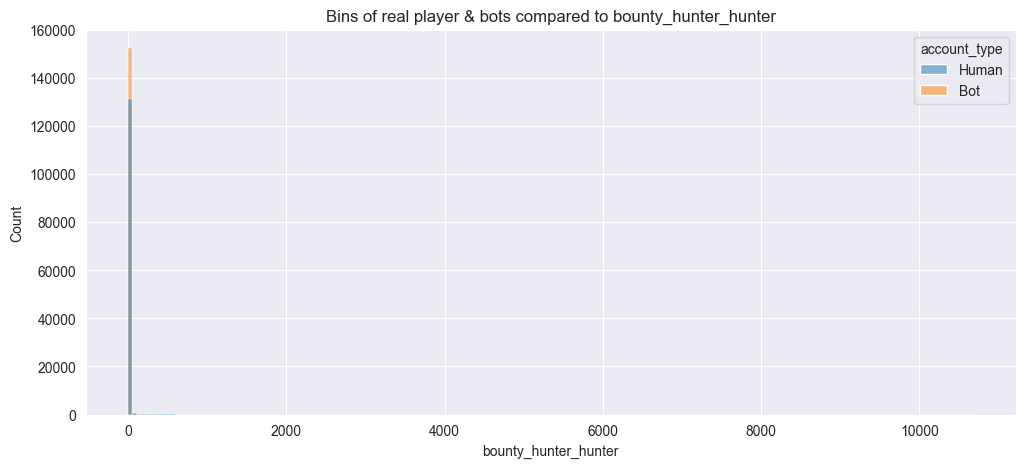

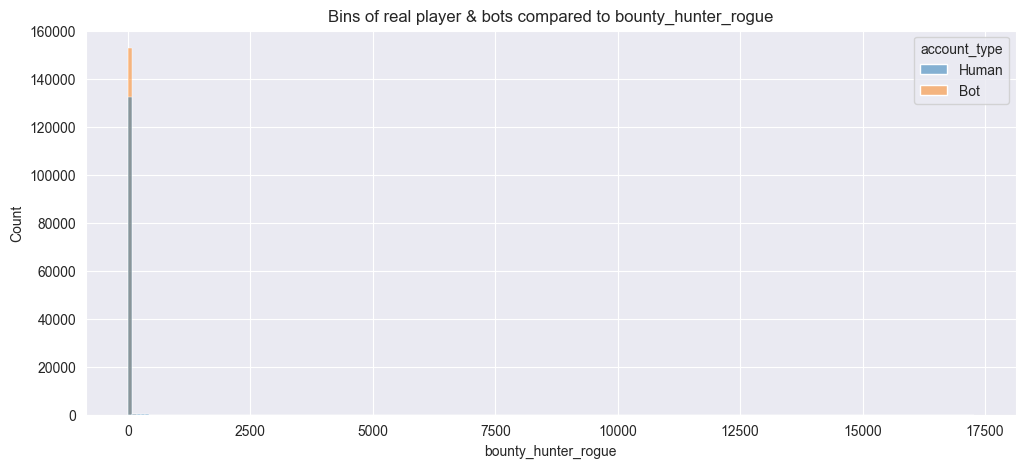

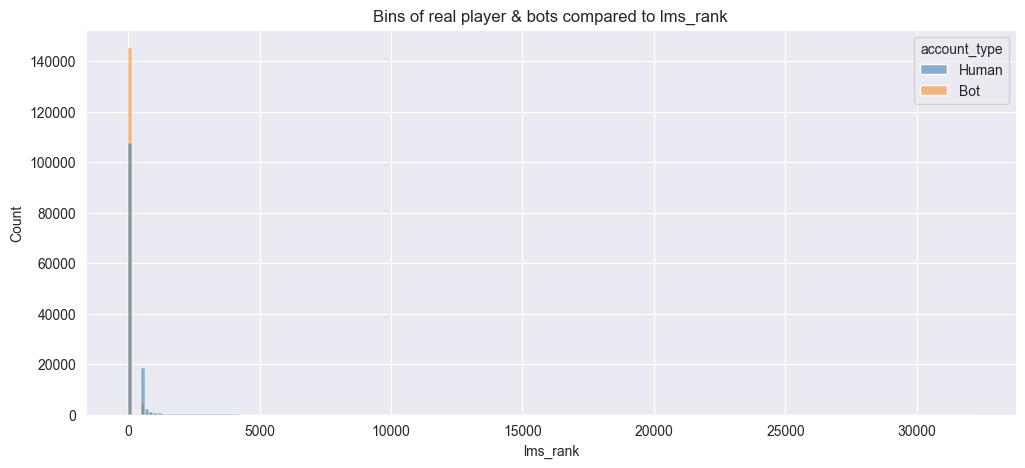

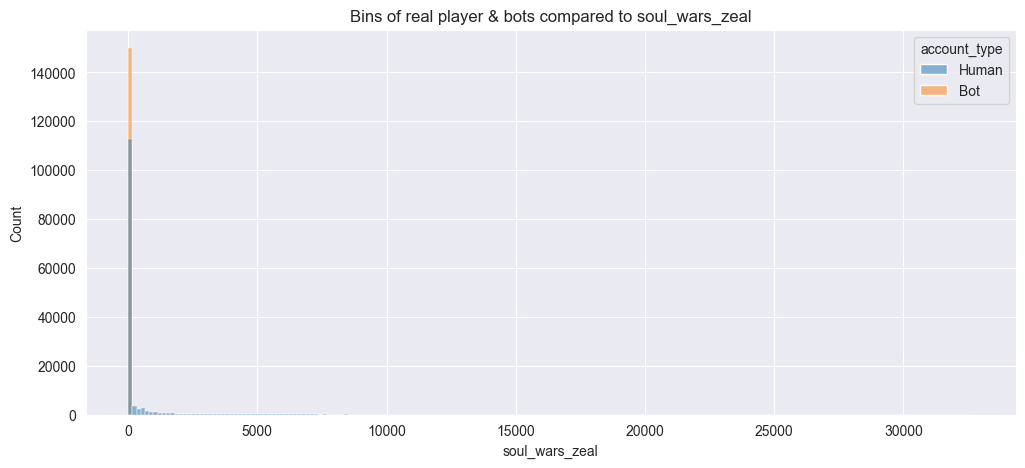

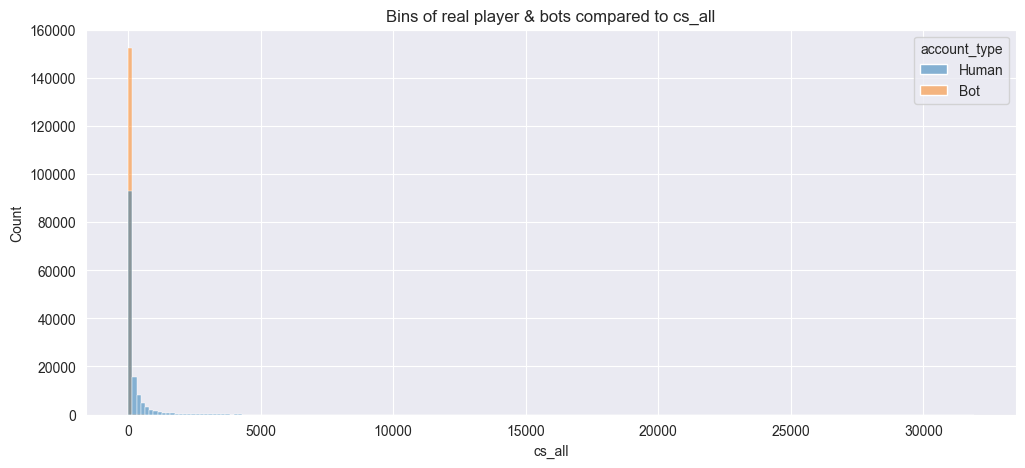

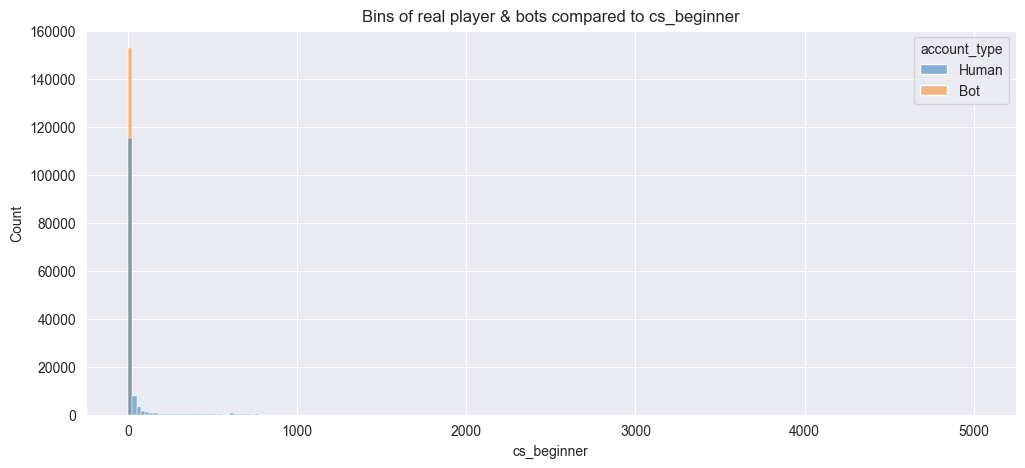

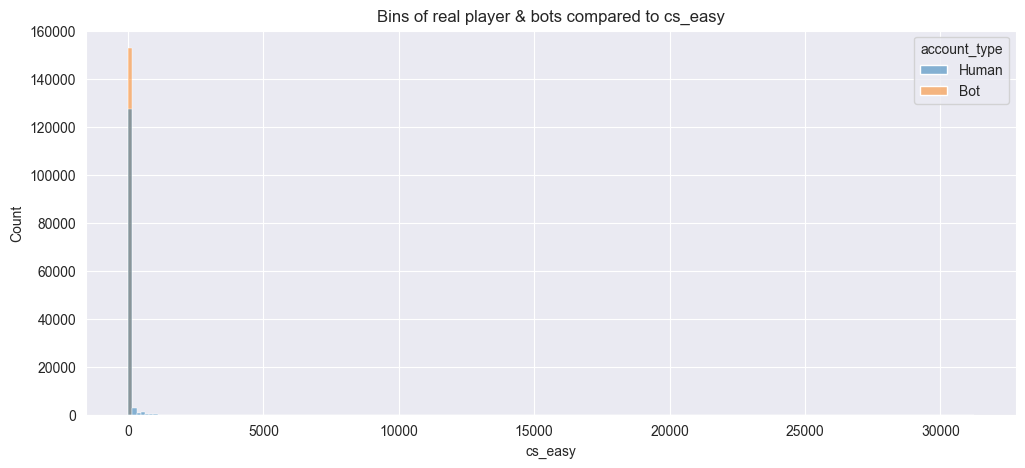

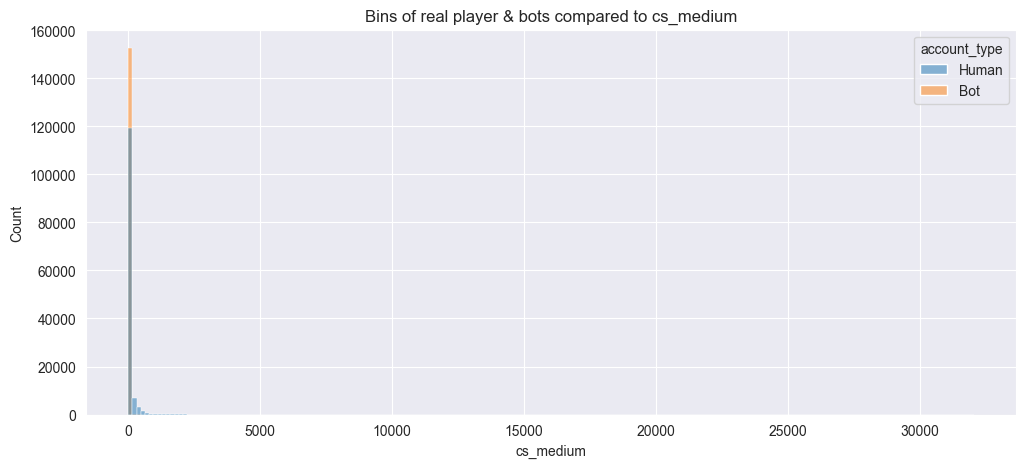

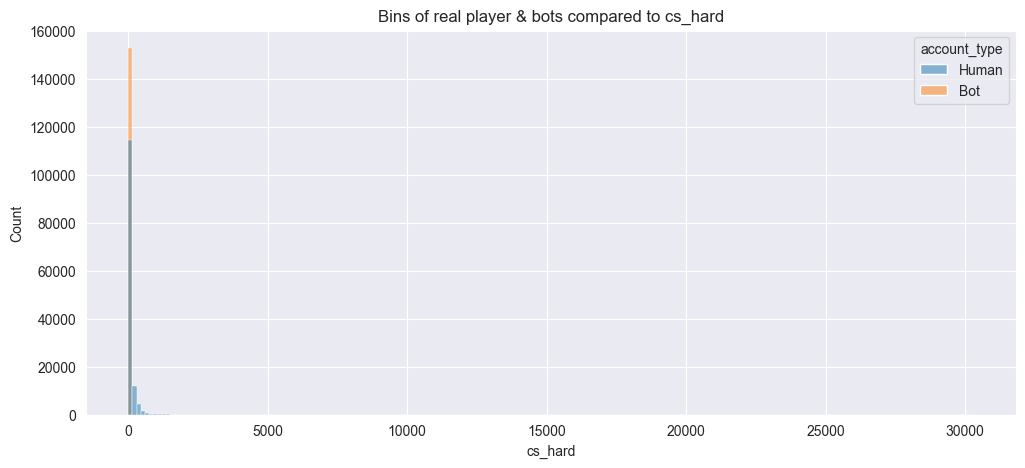

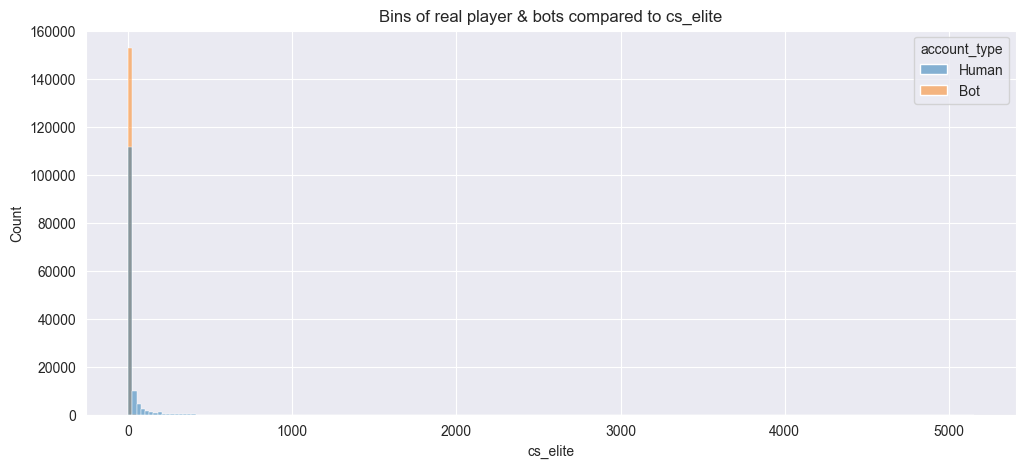

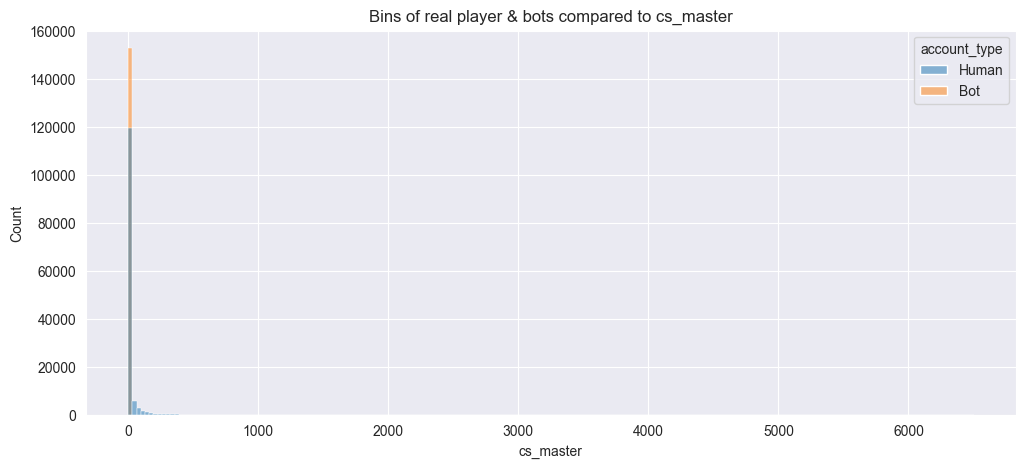

In [77]:
df_minigames = df[utils.MINIGAMES]
_df = df_player.merge(df_minigames, left_index=True, right_index=True).copy()
for minigame in df_minigames.columns:
    compare_ratio(minigame, _df.copy())